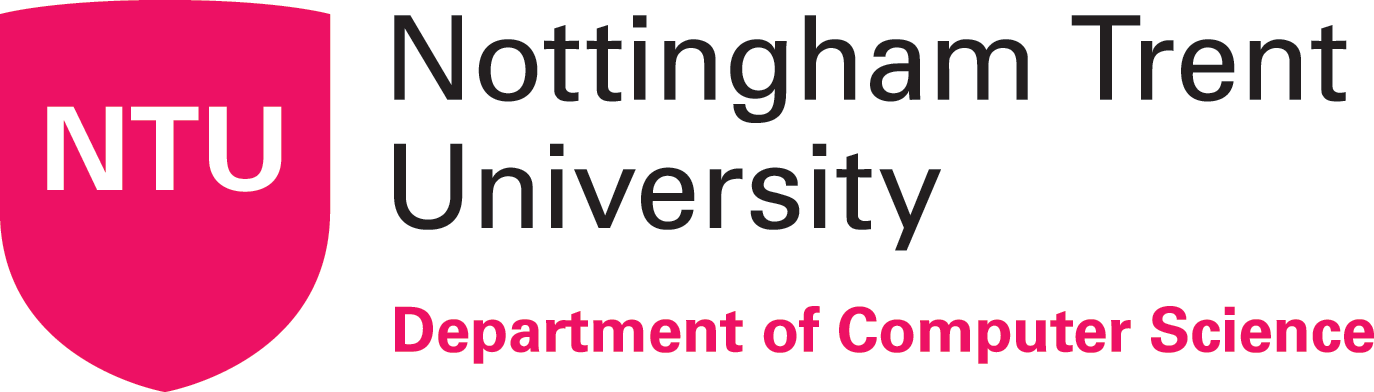

## SOFT40161 - Introduction to Computer Programming
## Submission of the Coursework

### Name: NWOGO EVERISTUS UGOCHUKWU
### NTU ID: N1280799

GitHub Link to my Repo: <a href="https://github.com/guavacoderepo/SOFT40161-COURSE-WORK.git"> (Click here 👈)</a>

In [2]:
# import packages
import re
import pandas as pd
import seaborn as sns
from pandas.core.series import Series
from pandas.core.frame import DataFrame

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 7)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Section 1: Control Structures (16 marks)


This section provides a detailed explanation and documentation of functions using control structures (if, for, try-except) created to aid the data analysis process:
- Age Grouping Function
    - Groups respondents' ages into defined categories (20 down, 21-30, 31-40, 41-50 and 51 up) to facilitate demographic analysis to ensures consistency in age representation across the dataset.
- Missing Values Evaluation Function
    - Calculates the number of missing values for each column by iterating through all the columns, helping to identify potential data quality issues and areas that may require imputation or removal.
- Gender Cleaning Function
    - Utilizes regular expressions to standardize gender entries (e.g., merging variations like "Male," "male," "M") to ensures consistent representation of gender data for accurate analysis.
- Country-to-Continent Mapping Function
    - Maps countries to their corresponding continents to enable regional and continental-level analysis to aid comparison of responses across different geographic regions

In [5]:
# Grouping ages into various categories
def group_age(age: int) -> str:
    '''
    age: int
    '''
    try:
        if age <= 20:
            return '20 down'
        elif age <= 30:
            return '21-30'
        elif age <= 40:
            return '31-40'
        elif age <= 50:
            return '41-50'
        return '51 up'
    except Exception as e:
        print(f"Error grouping age '{age}': {e}")
        return 'Unknown'

# Evaluating percentage of missing values
def evaluate_miss_values(df: DataFrame):
    '''
    df: Pandas dataframe
    '''
    try:
        miss_values = {}
        for col in df.columns:
            val = (df[col].isnull().sum() / len(df)) * 100
            miss_values[col] = val    
        return miss_values
    except Exception as e:
        print(f"Error evaluating missing values in DataFrame: {e}")
        return {}

# Cleaning gender column using regular expressions
def clean_gender(gender: str):
    '''
    gender: String
    '''
    try:
        male_pattern = re.compile(r'\b(male(?:[-\s]?(?:leaning|ish|cis|trans))?|m(?:ale)?|man|guy|msle|mal(?:e|r)?|maile|mail)\b', re.IGNORECASE)
        female_pattern = re.compile(r'\b(female(?:[-\s]?(?:leaning|ish|cis|trans))?|f(?:emale)?|woman|femake|femail|trans[-\s]?female|cis[-\s]?female)\b', re.IGNORECASE)

        if male_pattern.search(gender):
            return 'Male'
        elif female_pattern.search(gender):
            return 'Female'
        return 'Others'
    except Exception as e:
        print(f"Error cleaning gender '{gender}': {e}")
        return 'Unknown'

In [6]:
# To optimize the country column, let's group country by continent 
continents = {
    "North America": ['United States','Bahamas', 'Canada', 'Mexico', 'Costa Rica', 'Bahamas, The'],
    "Europe": ['United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Germany', 'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden', 'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland', 'Bosnia and Herzegovina', 'Hungary', 'Croatia', 'Norway', 'Denmark', 'Greece', 'Moldova', 'Russia', 'Czech Republic'],
    "Oceania": ['Australia', 'New Zealand'],
    "South America": ['Brazil', 'Colombia', 'Uruguay'],
    "Africa": ['South Africa', 'Zimbabwe', 'Nigeria'],
    "Asia": ['India', 'Israel', 'Thailand', 'Singapore', 'Japan', 'China', 'Georgia', 'Philippines'],
}


def country_to_continent(Country: str):
    '''
    Country: string
    '''
    try:
        for continent, countries in continents.items():
            if Country in countries:
                return continent
        return 'Unknown'
    except Exception as e:
        print(f"Error mapping country '{Country}' to continent: {e}")
        return 'Unknown'


In this section, I defined control structures using functions to simplify the analysis process, which will be used later in the project. These functions are designed with error handling mechanisms to catch and manage exceptions effectively, ensuring the code runs smoothly without interruptions. This demonstrates my ability to create and use appropriate and effective conditional structures in Python.

# Section 2: Functions and Modules (16 marks)  

This section provides an explanation and documentation of the functions used to create visualizations and format data for analysis. The visualization functions are designed to be modular and reusable, offering dynamic customization of colors, variables, titles, and axes. They include support for pie charts, doughnut charts, bar charts, count plots, scatter plots, violin plots, and line plots. Additionally, the section includes a function to format Timestamp values into a 'Year-Month' format to simplify analysis. The primary modules used in this section are pandas, matplotlib, and seaborn, which are imported at the beginning of this work.

In [7]:
# Pie chart plot function
def plot_pie_chart(values: list, labels: list, title: str, colors=plt.cm.Paired.colors, ax=None):
    '''
    Values: List of integers
    labels: List of string for each element in the value
    title: Title of the the chart/plot
    color: Color palette to be used
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        ax.pie(values, labels=labels, 
            wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, 
            textprops={'fontsize': 11, 'weight': 'roman'}, 
            colors=colors, 
            autopct='%1.2f%%')
        ax.set_title(title, fontsize=15, color='darkblue')
    except Exception as e:
        print(f"Error in plot_pie_chart: {e}")

# Doughnut chart plot function
def plot_doughnut_chart(values: list, labels: list, title: str, colors=sns.color_palette("muted"), ax=None):
    '''
    Values: List of integers
    labels: List of string for each element in the value
    title: Title of the the chart/plot
    color: Color palette to be used
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        ax.pie(values, labels=labels, 
            wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'width': 0.3}, 
            textprops={'fontsize': 11, 'weight': 'bold'}, 
            colors=colors, 
            startangle=90, 
            autopct='%1.2f%%')
        ax.set_title(title, fontsize=15, color='darkblue')
    except Exception as e:
        print(f"Error in plot_doughnut_chart: {e}")

# Bar chart plot function
def plot_bar_chart(x: list, y: list, title: str, ax=None):
    '''
    x: List of integers on x axies
    y: List of integers on y axies
    title: Title of the the chart/plot
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        ax.bar(x=x, height=y,
            color=plt.cm.Paired(range(len(x))), 
            edgecolor='black', 
            linewidth=0.8)
        ax.set_title(title, fontsize=15, color='darkblue')
        ax.set_xticklabels(x, rotation=60, fontsize=11)
        ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        for index, value in enumerate(y):
            ax.text(x=index, y=value + 0.02 * max(y), s=f'{str(round(value, 3))}', ha='center')
    except Exception as e:
        print(f"Error in plot_bar_chart: {e}")

# Count plot function
def plot_count_plot(data: DataFrame, x: str, title: str, hue=None, ax=None):
    '''
    data: Pandas dataframe for source data
    x: string values for x axies
    hue: Grouping class column
    title: Title of the the chart/plot
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        sns.countplot(data=data, x=x, hue=hue, palette='Set2', ax=ax)
        ax.set_title(title, fontsize=16, color='darkblue')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=11, color='#34495e')
        ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        for container in ax.containers:
            ax.bar_label(container)
    except Exception as e:
        print(f"Error in plot_count_plot: {e}")

# Scatter plot function
def plot_scatter_plot(x: list, y: list, title: str, ax=None):
    '''
    x: List of integers on x axies
    y: List of integers on y axies
    title: Title of the the chart/plot
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        ax.scatter(x=x, y=y,
            color=plt.cm.Paired(range(len(x))), 
            edgecolor='black', 
            linewidth=0.8)
        ax.set_title(title, fontsize=15, color='darkblue')
        ax.set_xticks(range(len(x)))
        ax.set_xticklabels(x, rotation=60, fontsize=11)
        ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        for index, value in enumerate(y):
            ax.text(x=index, y=value + 0.02 * max(y), s=f'{str(round(value, 3))}', ha='center')
    except Exception as e:
        print(f"Error in plot_scatter_plot: {e}")

# Violin plot function
def plot_violin_plot(data: DataFrame, x: str, title: str, hue=None, ax=None):
    '''
    data: Pandas dataframe for source data
    x: string values for x axies
    hue: Grouping class column
    title: Title of the the chart/plot
    ax: Axes 
    '''
    try:
        if ax is None:
            ax = plt.gca()
        sns.violinplot(data=data, x=x, hue=hue, palette='Set2', ax=ax)
        ax.set_title(title, fontsize=16, color='darkblue')
        for label in ax.get_xticklabels():
            label.set_rotation(45)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    except Exception as e:
        print(f"Error in plot_violin_plot: {e}")


In [9]:
# Timestamp to YearMonth converter function
def timestamp_formatter(df: DataFrame):
    '''
    df: Pandas dataframe
    '''
    try:
        # Convert 'Timestamp' column to datetime and extract year month
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['YearMonth'] = df['Timestamp'].dt.to_period('M')
        df.drop(columns=['Timestamp'], inplace=True)
    except KeyError as e:
        print(f"Error: The 'Timestamp' column is missing in the dataframe. {e}")
    except Exception as e:
        print(f"An error occurred while formatting the timestamp: {e}")

In this section, I created reusable and dynamic functions for handling visualizations and time formatting, which will be used in exploratory data analysis (EDA) and data cleaning, respectively. These functions include error handling to ensure smooth execution. This demonstrates my ability to create and use appropriate and effective function in Python.

# Section 3: Data Handling with Pandas (16 marks)  

This section provides an explanation and documentation of the data handling process in this work, which includes:

- How the data was read into the dataset
- How relevant columns were selected for analysis
- Data understanding
- Handling missing values and duplicate values using fillna and duplication method
- Data formatting for consistency
- Filter and aggregate functions using groupby method
- Save csv using to_csv method

In [52]:
# Read dataset into pandas frame
# url = 'dataset/survey.csv'
url = 'https://drive.google.com/uc?id=125xSItHwNzmZO4vDnsQEdRsWxiJOut6b&export=download'

df = pd.read_csv(url, index_col='s/n')
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
s/n,,,,,,,,,,,,,,,,,,,,,
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Less than 26,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [11]:
# Checking the shape of the dataset
size = df.shape
print(f'The dataset has {size[1]} columns and {size[0]} rows')

The dataset has 27 columns and 1273 rows


In [12]:
# Statistical description of numerical columns
df.describe()

,Age
count,1.273000e+03
mean,7.855463e+07
std,2.802759e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1272
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1273 non-null   object
 1   Age                        1273 non-null   int64 
 2   Gender                     1273 non-null   object
 3   Country                    1273 non-null   object
 4   state                      752 non-null    object
 5   self_employed              1255 non-null   object
 6   family_history             1273 non-null   object
 7   treatment                  1273 non-null   object
 8   work_interfere             1006 non-null   object
 9   no_employees               1273 non-null   object
 10  remote_work                1273 non-null   object
 11  tech_company               1273 non-null   object
 12  benefits                   1273 non-null   object
 13  care_options               1273 non-null   object
 14  wellness_prog

In [14]:
# check count of missing values
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         521
self_employed                  18
family_history                  0
treatment                       0
work_interfere                267
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1108
dtype: int64

In [15]:
# Selecting revalevant columns for analysis
select_cols = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'no_employees', 'work_interfere', 'wellness_program', 'leave', 'care_options', 'obs_consequence']

In [16]:
# Drill down the dimension of the dataset
df = df[select_cols]
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence
s/n,,,,,,,,,,,,,,
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Less than 26,Often,No,Somewhat easy,Not sure,No
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No


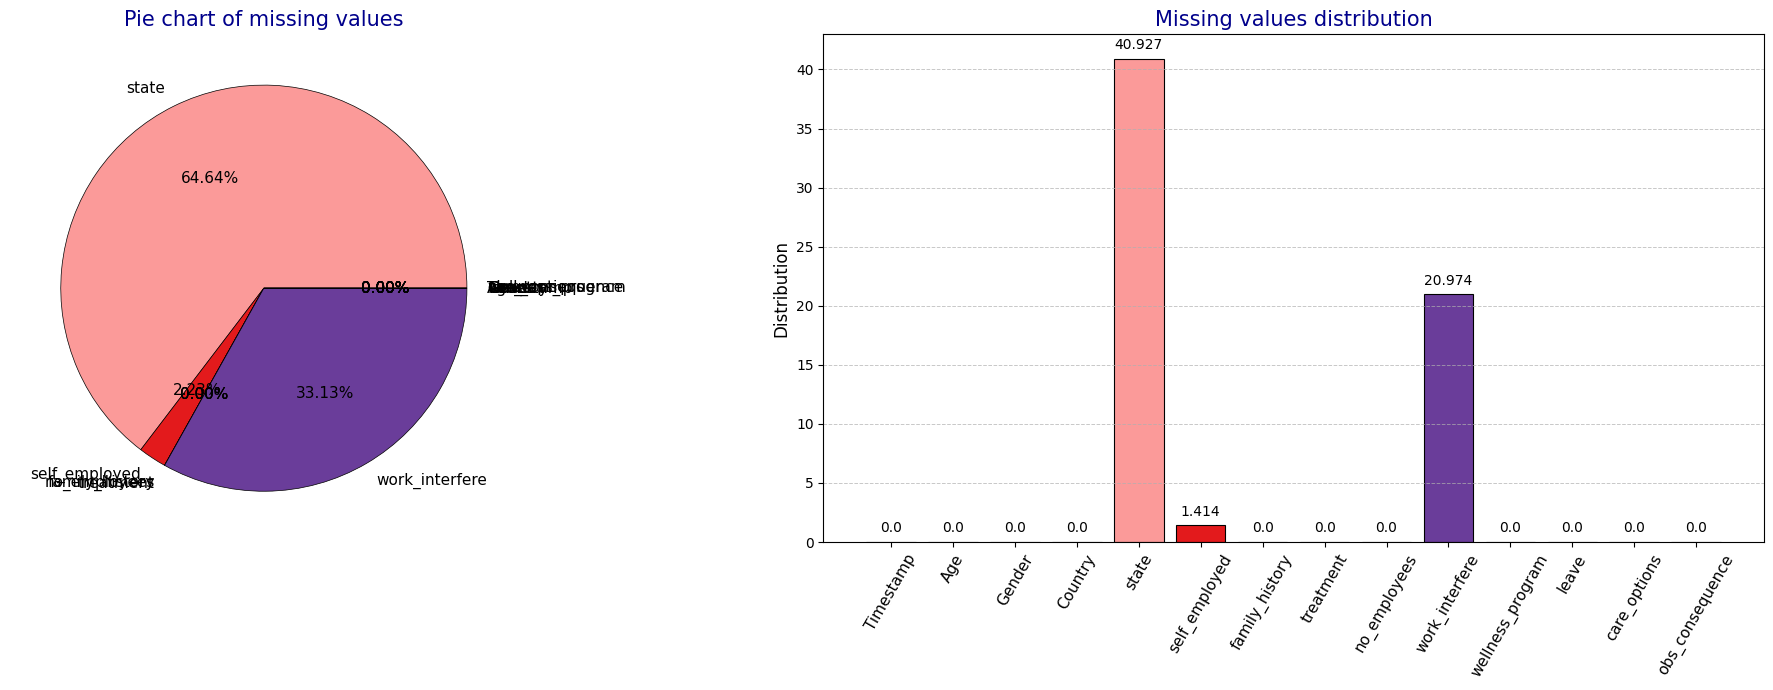

In [17]:
# Ploting missing values
fig, (ax1, ax2) = plt.subplots(1, 2)

miss_values: dict = evaluate_miss_values(df)

# Bar chart distribution of missing values
plot_bar_chart(miss_values.keys(), miss_values.values(), 'Missing values distribution', ax=ax2)
plt.ylabel('Distribution', fontsize=12);

# ploting a pie chat of missing values
plot_pie_chart(list(miss_values.values()), list(miss_values.keys()), 'Pie chart of missing values', ax=ax1)
plt.tight_layout()

In [18]:
# Creating a new column of continents from countries
df['Continents'] = df['Country'].apply(lambda z: country_to_continent(z))

In [19]:
# Grouping age 
df['Age'] = df['Age'].apply(group_age)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
s/n,,,,,,,,,,,,,,,
0,8/27/2014 11:29,31-40,Female,United States,IL,NaN,No,Yes,Less than 26,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [20]:
# Unique entries in gender column
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [21]:
df['no_employees'].unique()

array(['Less than 26', 'More than 1000', '26-100', '100-500', '500-1000'],
      dtype=object)

In [22]:
# Cleaning gender column
df['Gender'] = df['Gender'].apply(clean_gender)
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
s/n,,,,,,,,,,,,,,,
0,8/27/2014 11:29,31-40,Female,United States,IL,NaN,No,Yes,Less than 26,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,Male,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [23]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [24]:
# Create a new column -> duplicate
df['duplicates'] = df.duplicated(keep='last')
# Count duplicates and non-duplicates
duplicates_counts = df['duplicates'].value_counts()

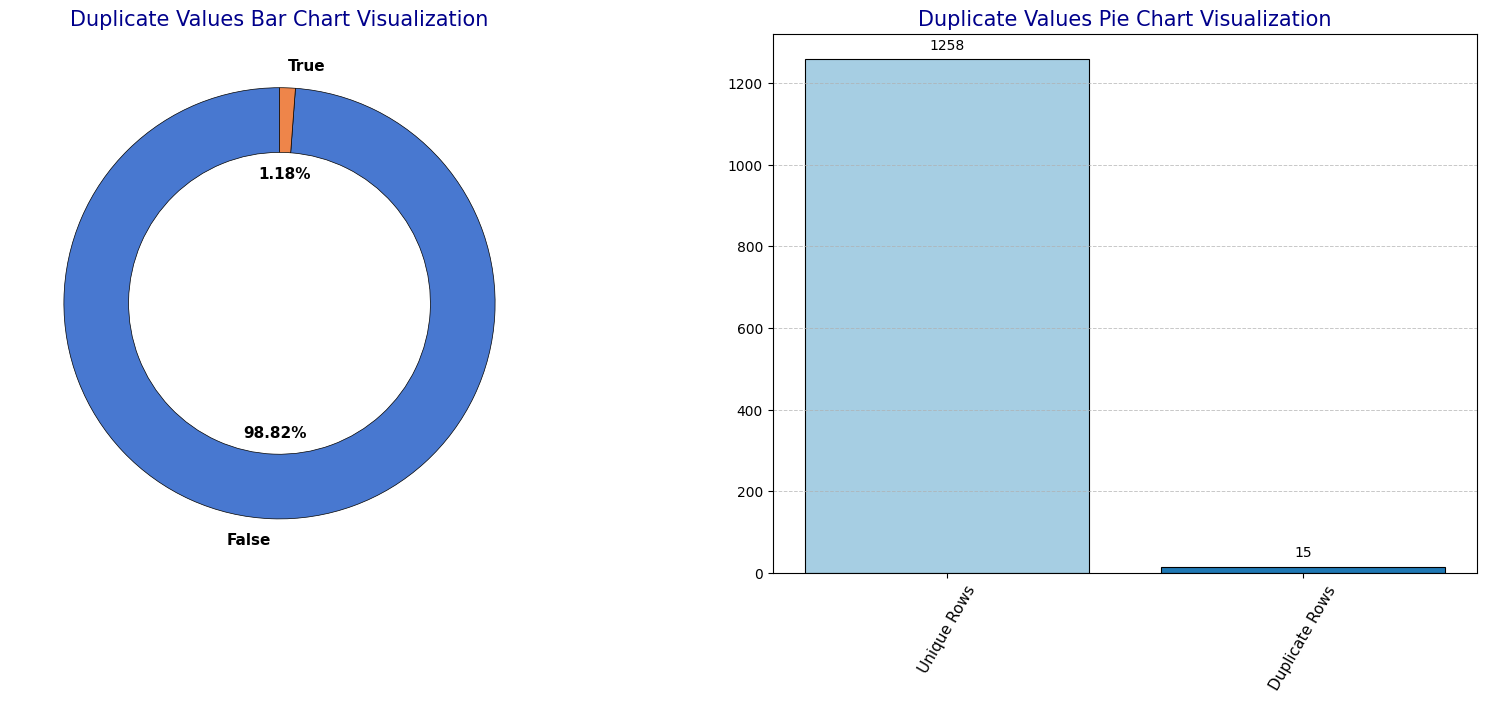

In [25]:
# Plot duplicates and non-duplicates values count
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_bar_chart(duplicates_counts.index, duplicates_counts.values, title='Duplicate Values Pie Chart Visualization', ax=ax2)
plt.xticks([0, 1], ['Unique Rows', 'Duplicate Rows']);

plot_doughnut_chart(labels=duplicates_counts.index, values=duplicates_counts.values, title='Duplicate Values Bar Chart Visualization', ax=ax1)

In [26]:
# Drop all duplicates and drop the duplicate column
df = df.drop_duplicates(keep='last').drop(columns=['duplicates'])

In [27]:
# Fill missing values on self employed column using the mode
self_employed_mode = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(self_employed_mode)

df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options,obs_consequence,Continents
s/n,,,,,,,,,,,,,,,
0,8/27/2014 11:29,31-40,Female,United States,IL,No,No,Yes,Less than 26,Often,No,Somewhat easy,Not sure,No,North America
1,8/27/2014 11:29,41-50,Male,United States,IN,No,No,No,More than 1000,Rarely,Don't know,Don't know,No,No,North America


In [28]:
# Formating timestamp column
timestamp_formatter(df)

In [29]:
# Droping all columns with missing values
df.dropna(axis=1, inplace=True)

In [30]:
# Droping columns with missing values
df.isnull().sum()

Age                 0
Gender              0
Country             0
self_employed       0
family_history      0
treatment           0
no_employees        0
wellness_program    0
leave               0
care_options        0
obs_consequence     0
Continents          0
YearMonth           0
dtype: int64

In [31]:
df.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
s/n,,,,,,,,,,,,,
0,31-40,Female,United States,No,No,Yes,Less than 26,No,Somewhat easy,Not sure,No,North America,2014-08
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No,No,North America,2014-08


In [32]:
# Let's filter male with mental health
staff_with_mental_health = df[(df['obs_consequence'] == 'Yes') & (df['Gender'] == 'Male')].reset_index(drop=True)

# Save as csv in analysis folder
staff_with_mental_health.to_csv('analysis/staff_with_mental_health.csv')
staff_with_mental_health.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
0,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes,Yes,Europe,2014-08
1,41-50,Male,United States,Yes,Yes,No,Less than 26,Yes,Very easy,Not sure,Yes,North America,2014-08
2,31-40,Male,United States,Yes,Yes,No,Less than 26,No,Somewhat difficult,Yes,Yes,North America,2014-08
3,21-30,Male,United Kingdom,No,No,Yes,Less than 26,No,Don't know,No,Yes,Europe,2014-08
4,41-50,Male,United States,No,Yes,Yes,More than 1000,No,Don't know,No,Yes,North America,2014-08


In [33]:
# Group gender by number observation
gender_grouped = df.groupby(['obs_consequence', 'Gender']).size().reset_index(name='observations')

gender_grouped

,obs_consequence,Gender,observations
0,No,Female,204
1,No,Male,871
2,No,Others,12
3,Yes,Female,50
4,Yes,Male,131
5,Yes,Others,5


In [34]:
# Group countries by number 
countries_grouped = df.groupby(['obs_consequence', 'Country']).size().reset_index(name='observations')

countries_grouped

,obs_consequence,Country,observations
0,No,Australia,13
1,No,Austria,3
2,No,Belgium,4
3,No,Brazil,3
4,No,Bulgaria,3
...,...,...,...
63,Yes,South Africa,3
64,Yes,Sweden,1
65,Yes,United Kingdom,38
66,Yes,United States,90


In [35]:
# People that filled the survey in 2014
df_2014 = df[df['YearMonth'].dt.year == 2014] 

# Save 2024 record as csv in analysis folder
df_2014.to_csv('analysis/survey_2024.csv')
df_2014

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options,obs_consequence,Continents,YearMonth
s/n,,,,,,,,,,,,,
0,31-40,Female,United States,No,No,Yes,Less than 26,No,Somewhat easy,Not sure,No,North America,2014-08
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No,No,North America,2014-08
2,31-40,Male,Canada,No,No,No,Less than 26,No,Somewhat difficult,No,No,North America,2014-08
3,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes,Yes,Europe,2014-08
4,31-40,Male,United States,No,No,No,100-500,Don't know,Don't know,No,No,North America,2014-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,21-30,Male,United States,No,No,No,More than 1000,No,Don't know,Not sure,No,North America,2014-09
1269,21-30,Male,United States,No,No,No,More than 1000,Yes,Don't know,No,No,North America,2014-09
1270,31-40,Female,United States,No,Yes,Yes,26-100,No,Somewhat easy,Yes,Yes,North America,2014-09


In this section, I successfully cleaned the data, preparing it for analysis and machine learning modeling. Using various pandas methods, I explored and understood the dataset. I applied functions from Sections 1 and 2 to create visualizations and properly format the columns. Missing values and duplicates were handled with appropriate strategies, and I filtered and aggregated the data for better clarity and interpretation. This demonstrates my ability to work with pandas for data handling in Python.

# Section 4: Data Visualization (16 marks)  

This section covers various visualizations for better data understanding, including:

- Univariate Analysis: This provides insights into individual columns in the dataset.
- Bivariate Analysis: This explores the relationship between two variables in the dataset.
- Multivariate Analysis: This examines the relationships between more than two columns in the dataset.

These visualizations help uncover hidden patterns in the data and provide a clearer understanding of how the variables relate to one another, giving valuable business insights.

#### Univariant Analysis

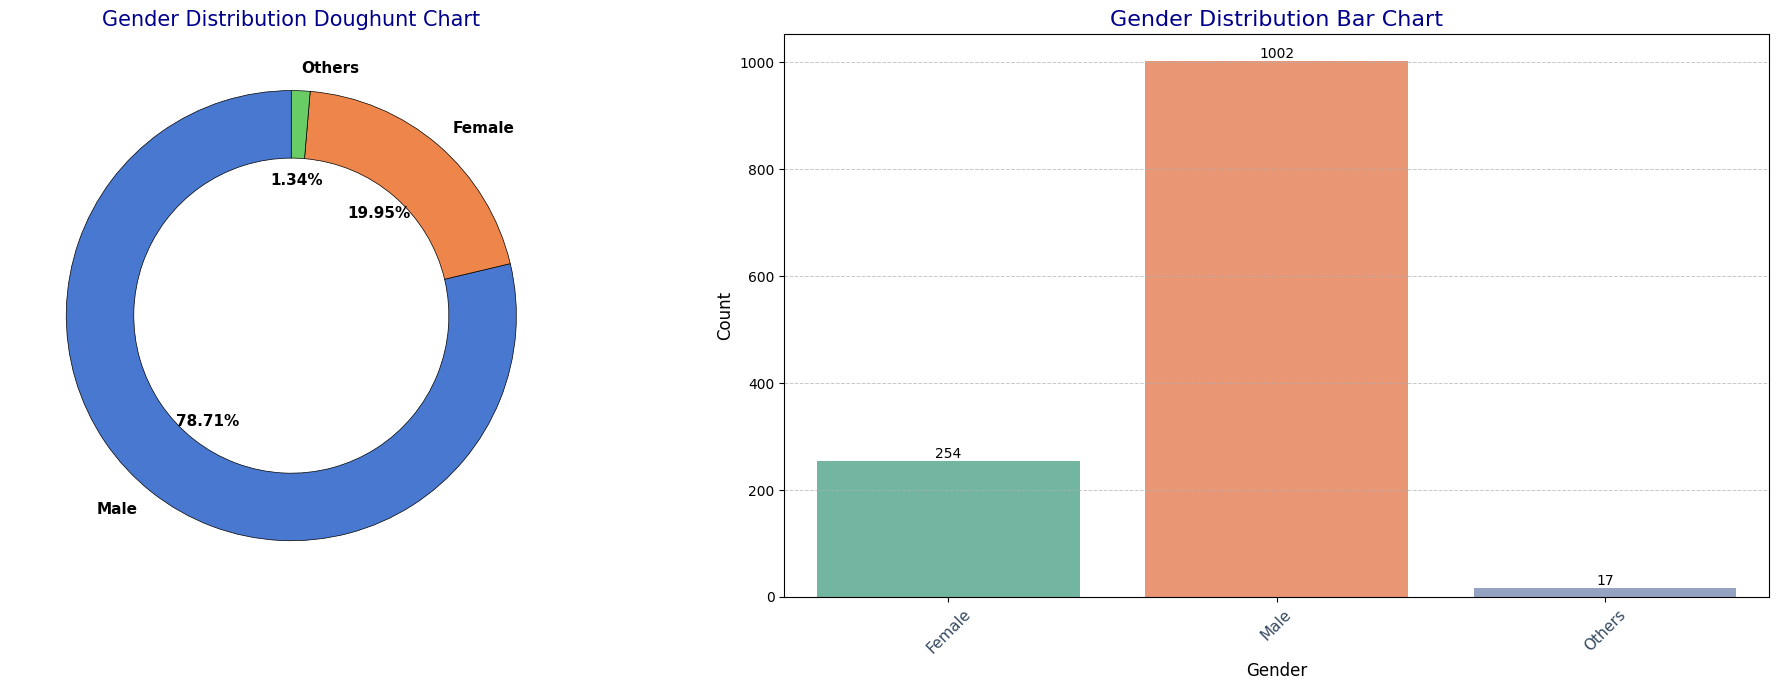

In [36]:
# Gender distribution charts
fig, (ax1, ax2) = plt.subplots(1, 2)

plot_count_plot(df, 'Gender', 'Gender Distribution Bar Chart', ax=ax2);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Count', fontsize=12);

values = df['Gender'].value_counts()
labels = values.index
plot_doughnut_chart(values, labels,"Gender Distribution Doughunt Chart",  ax=ax1);
plt.tight_layout()

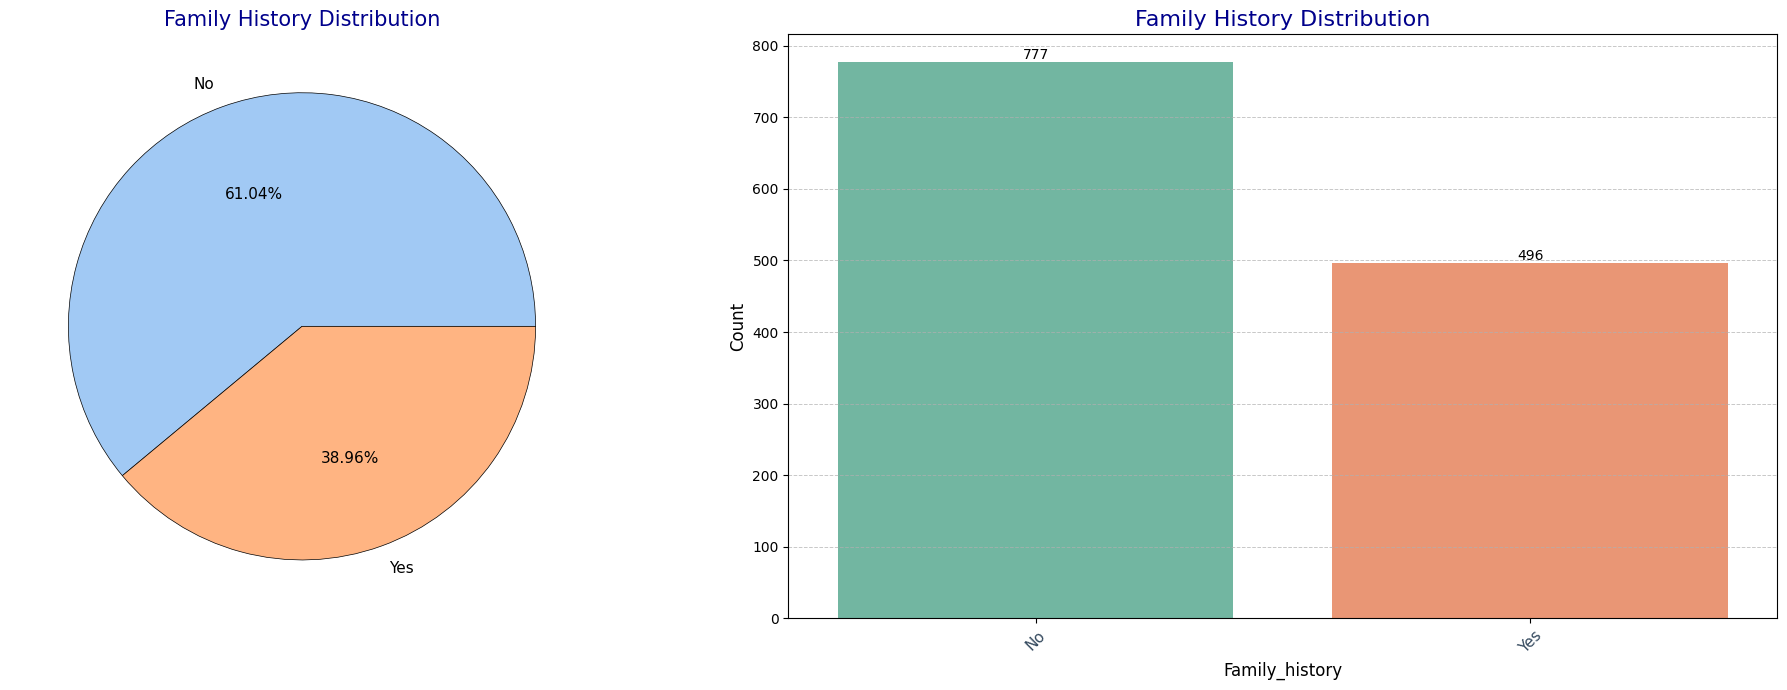

In [37]:
# Family History Distribution
fig, (ax1, ax2) = plt.subplots(1, 2)
values = df['family_history'].value_counts()
labels = values.index
plot_pie_chart(values, labels, 'Family History Distribution', sns.color_palette('pastel'), ax=ax1)

plot_count_plot(df, 'family_history', 'Family History Distribution', ax=ax2);
plt.xlabel('Family_history', fontsize=12);
plt.ylabel('Count', fontsize=12);

plt.tight_layout()

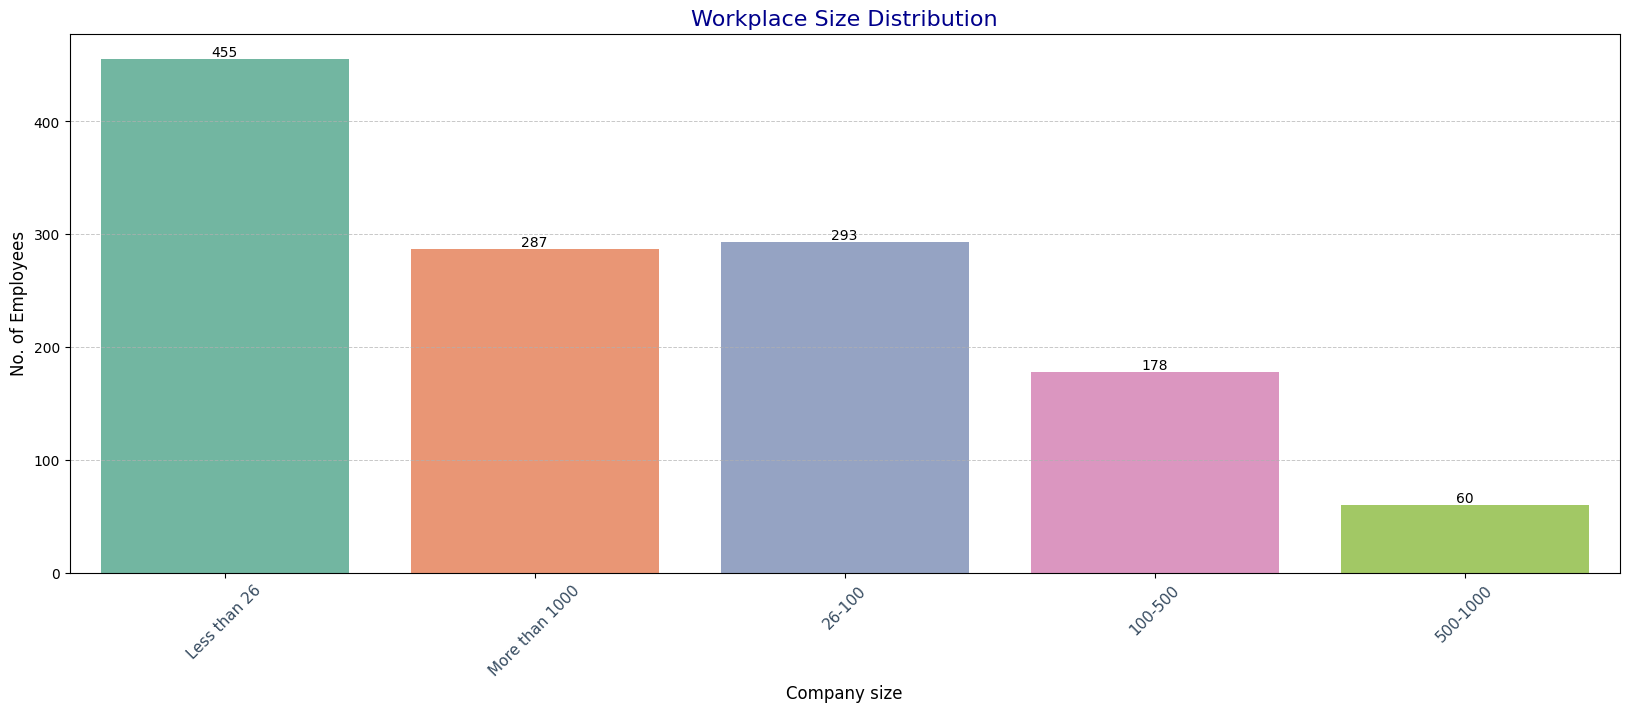

In [38]:
# Number of employee distribution
plot_count_plot(df, 'no_employees', 'Workplace Size Distribution')
plt.xlabel('Company size', fontsize=12)
plt.ylabel('No. of Employees', fontsize=12);

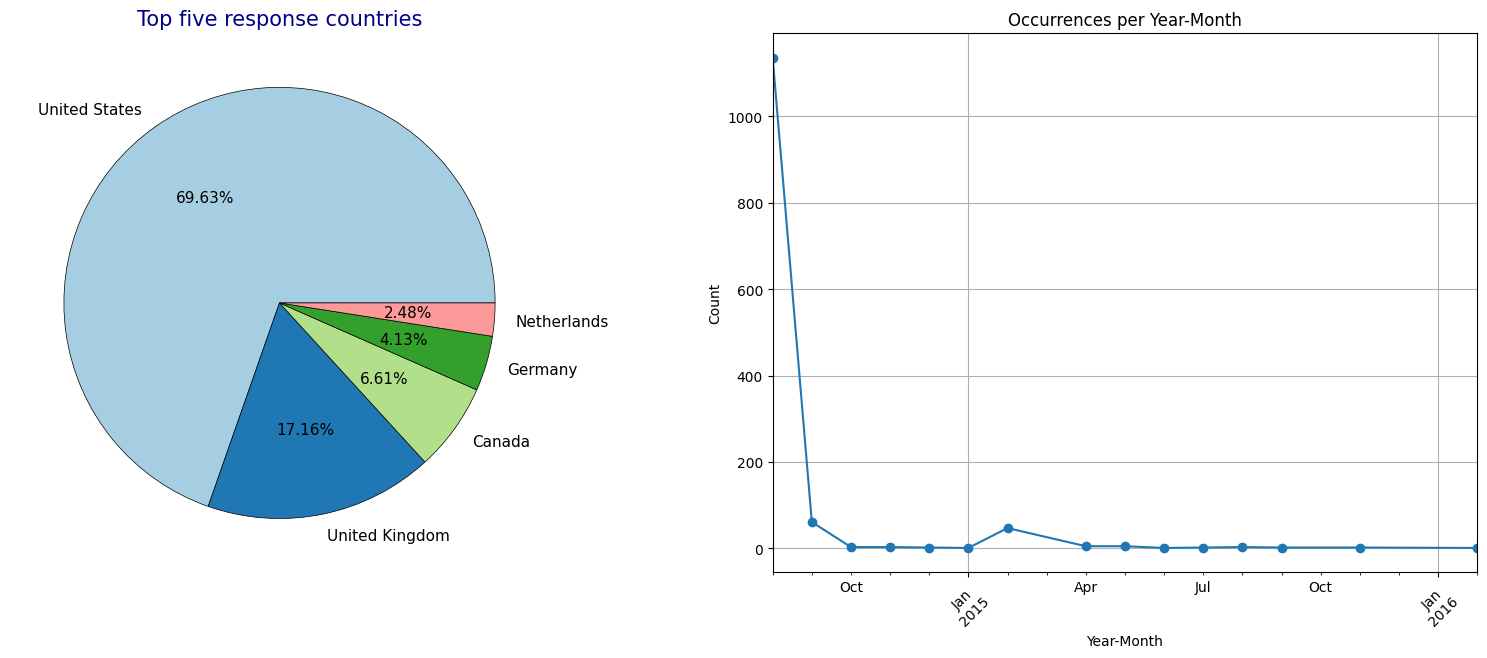

In [39]:
# Distribution of the how individuals response to the survey
fig, (ax1, ax2) = plt.subplots(1, 2)
duration_value = df.groupby('YearMonth')['YearMonth'].value_counts()

duration_value.plot(kind='line', marker='o', ax=ax2)
plt.title('Occurrences per Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# top five countries chart
values = df['Country'].value_counts().head(5)
labels = values.index

plot_pie_chart(values, labels,"Top five response countries", ax=ax1)

#### Bivariant Analysis

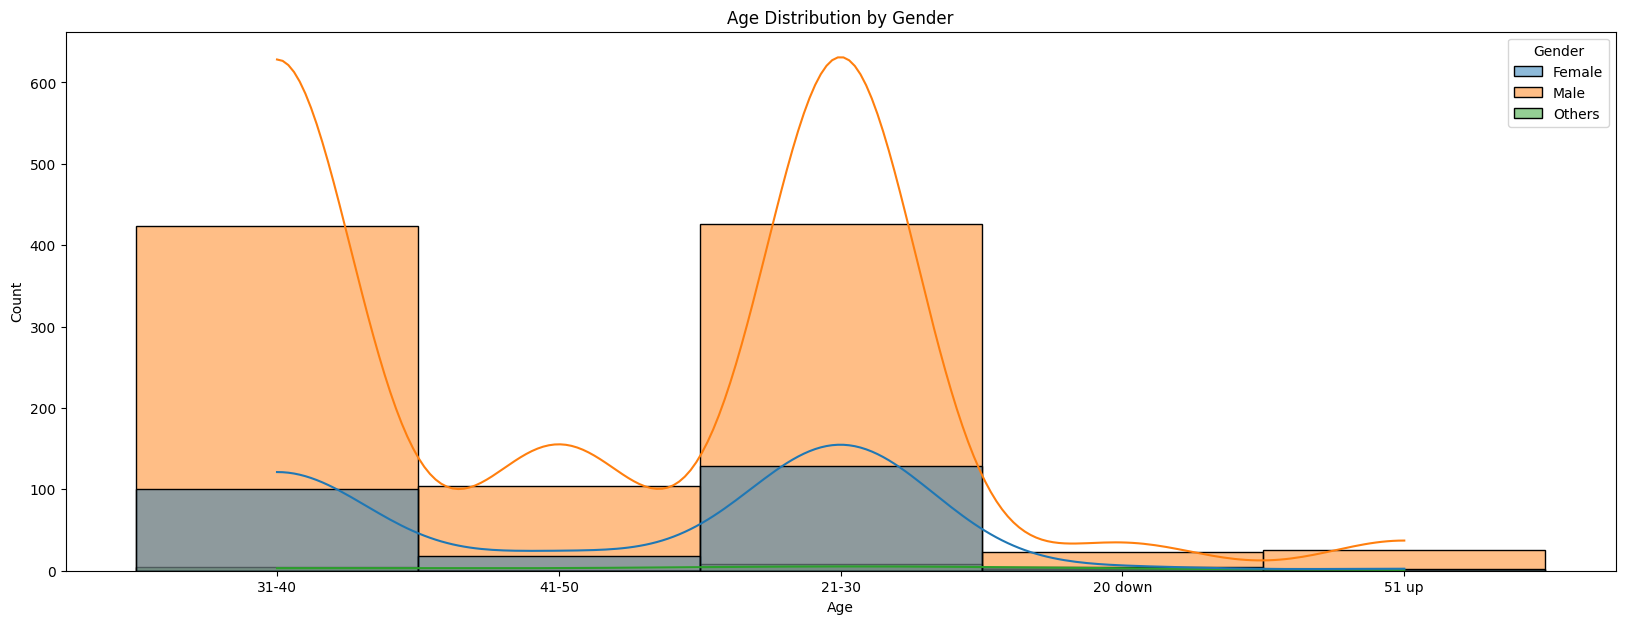

In [40]:
# Analyze the distribution of ages across different genders.
sns.histplot(data=df, x='Age', hue='Gender', kde=True, bins=20)
plt.title('Age Distribution by Gender')
plt.show()

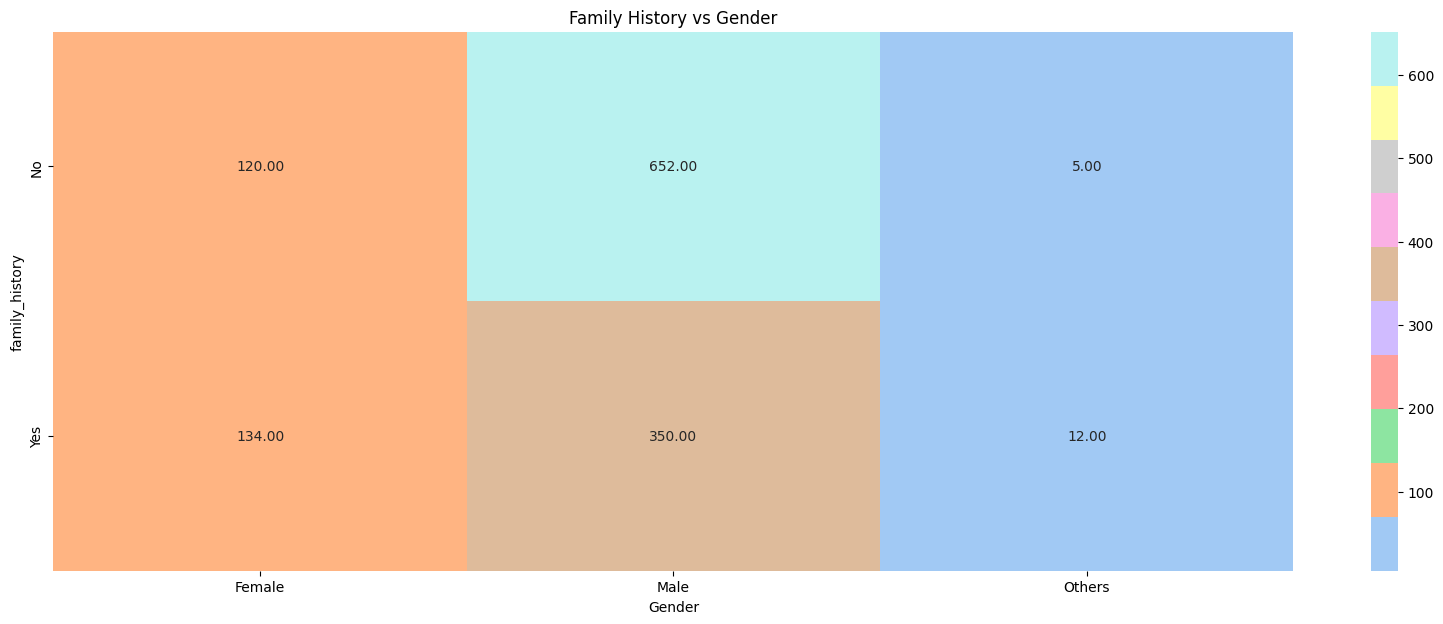

In [41]:
# Family History distribution by Gender
family_treatment = df.groupby(['family_history', 'Gender']).size().unstack()
sns.heatmap(family_treatment, annot=True, fmt='.2f', cmap=sns.color_palette('pastel'))
plt.title('Family History vs Gender');

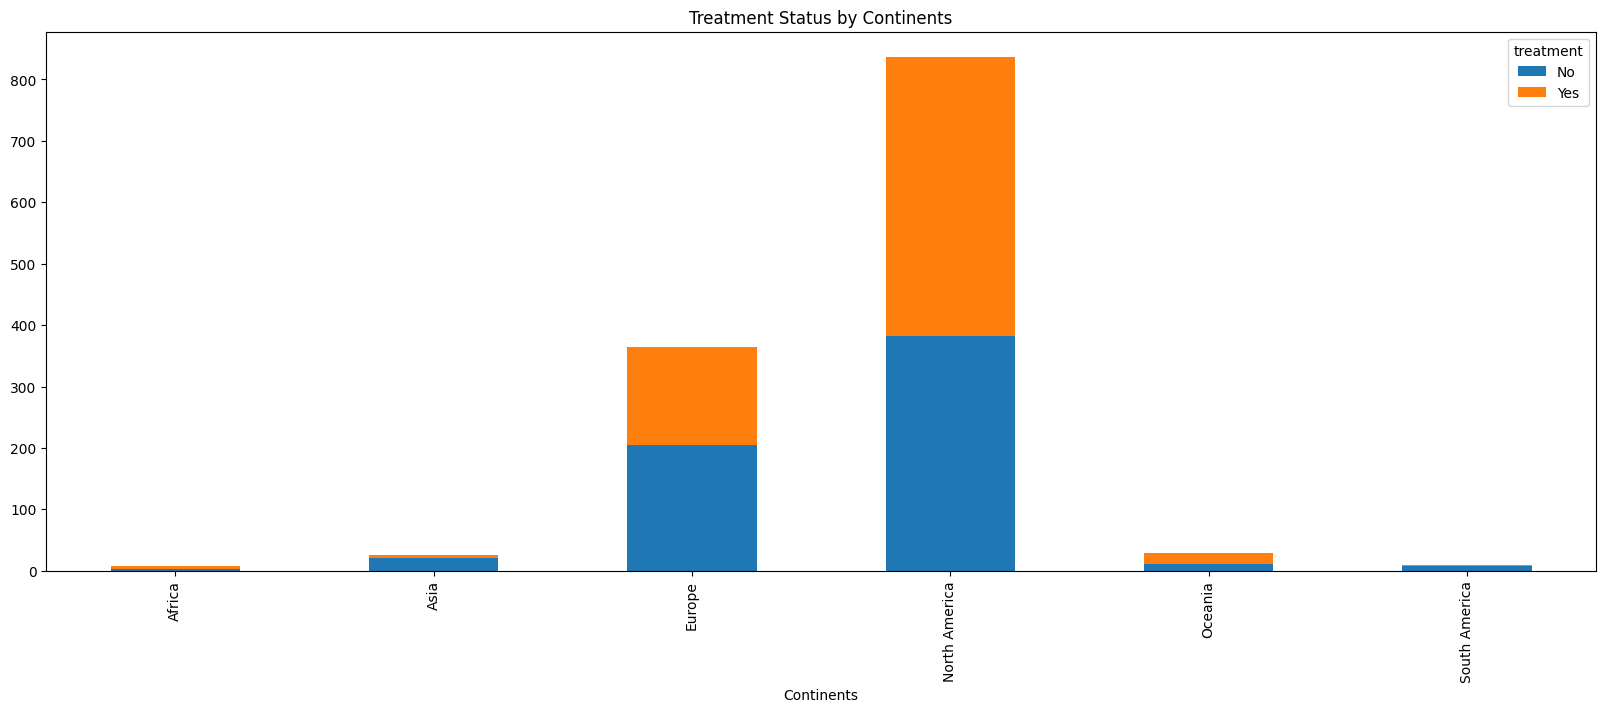

In [42]:
# To identify trends in treatment-seeking behavior across Continents.
treatment_counts = df.groupby('Continents')['treatment'].value_counts().unstack()
treatment_counts.plot(kind='bar', stacked=True)
plt.title('Treatment Status by Continents');

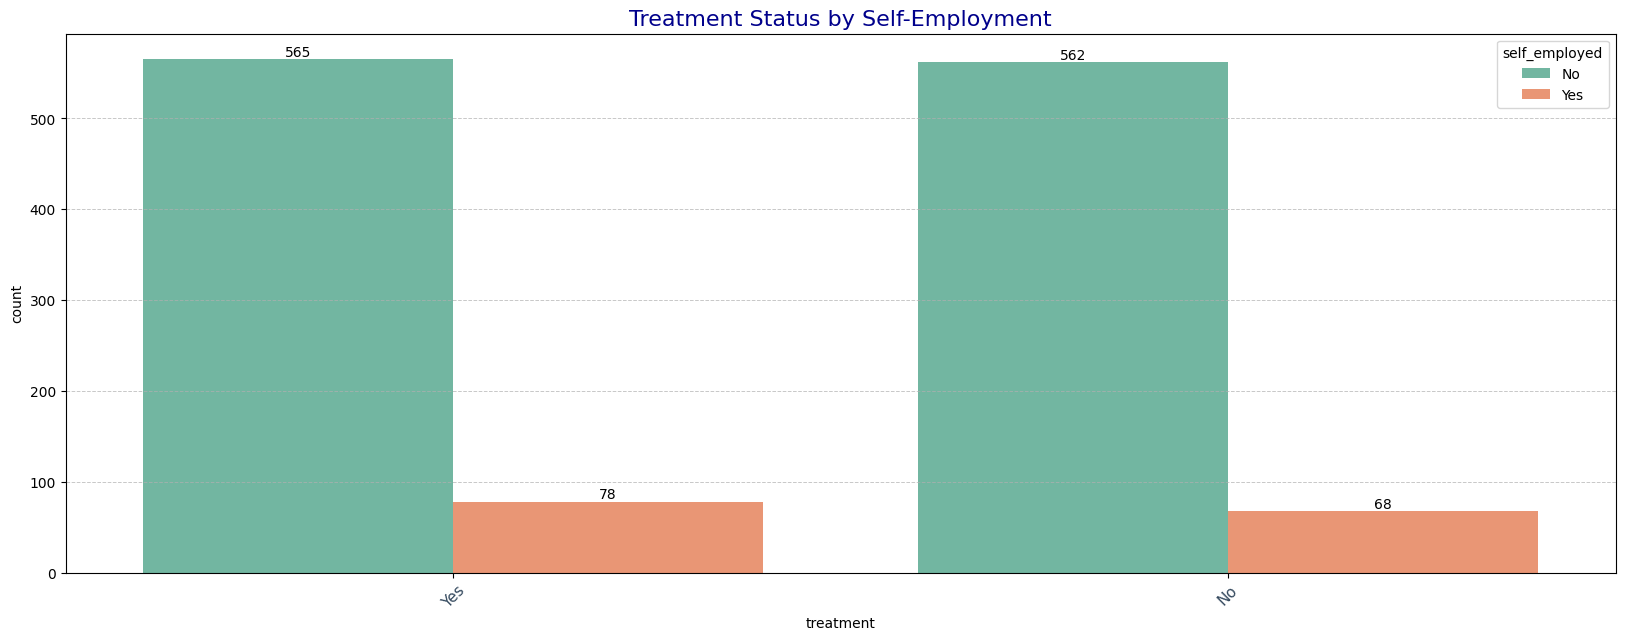

In [43]:
# To compare the proportion of individuals seeking treatment based on their self-employment status.
plot_count_plot(data=df, x='treatment', hue='self_employed', title='Treatment Status by Self-Employment')

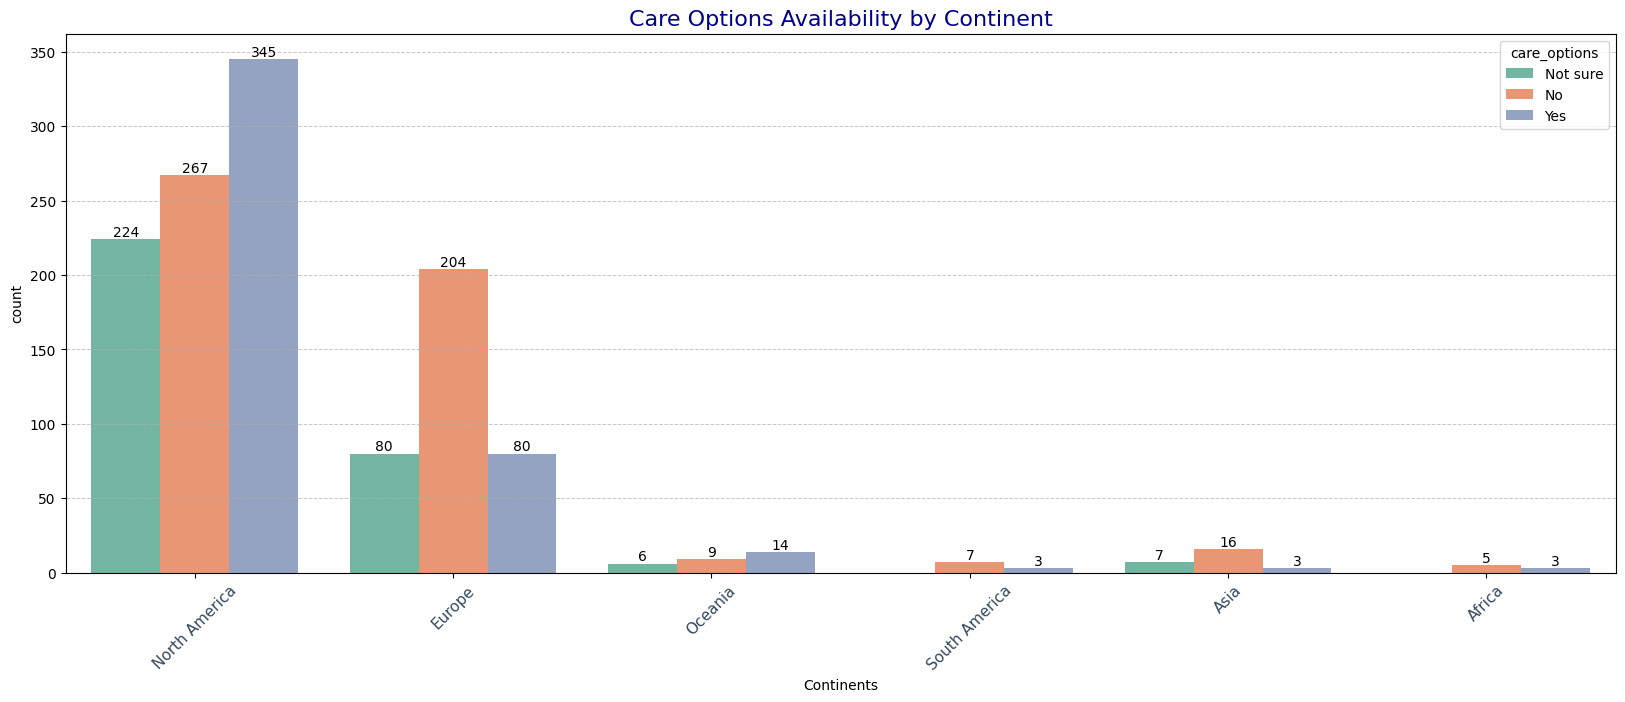

In [44]:
# To examine the distribution of care options across continents.
plot_count_plot(data=df, x='Continents', hue='care_options', title='Care Options Availability by Continent')

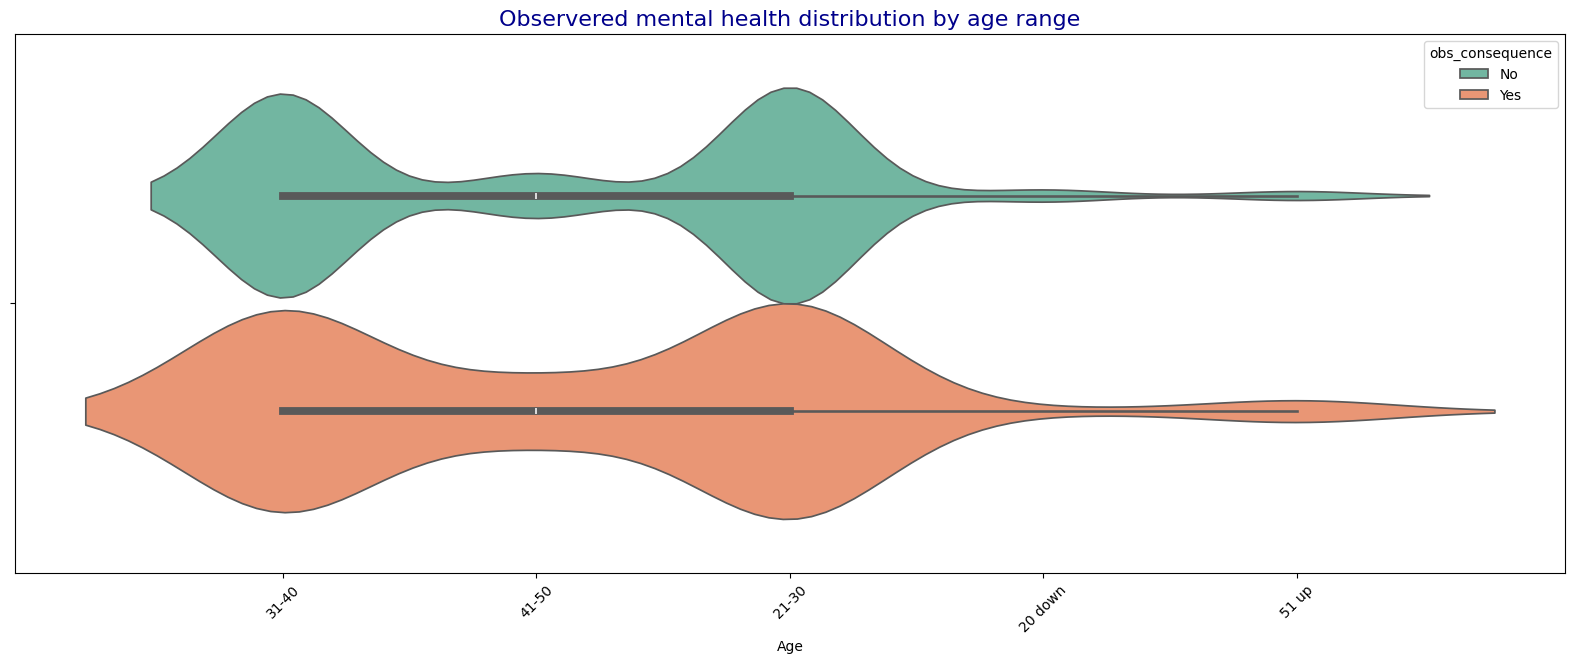

In [45]:
# Observered mental health distribution by age range violin plot
plot_violin_plot(df, 'Age', 'Observered mental health distribution by age range', hue='obs_consequence')

#### Multivariant Analysis

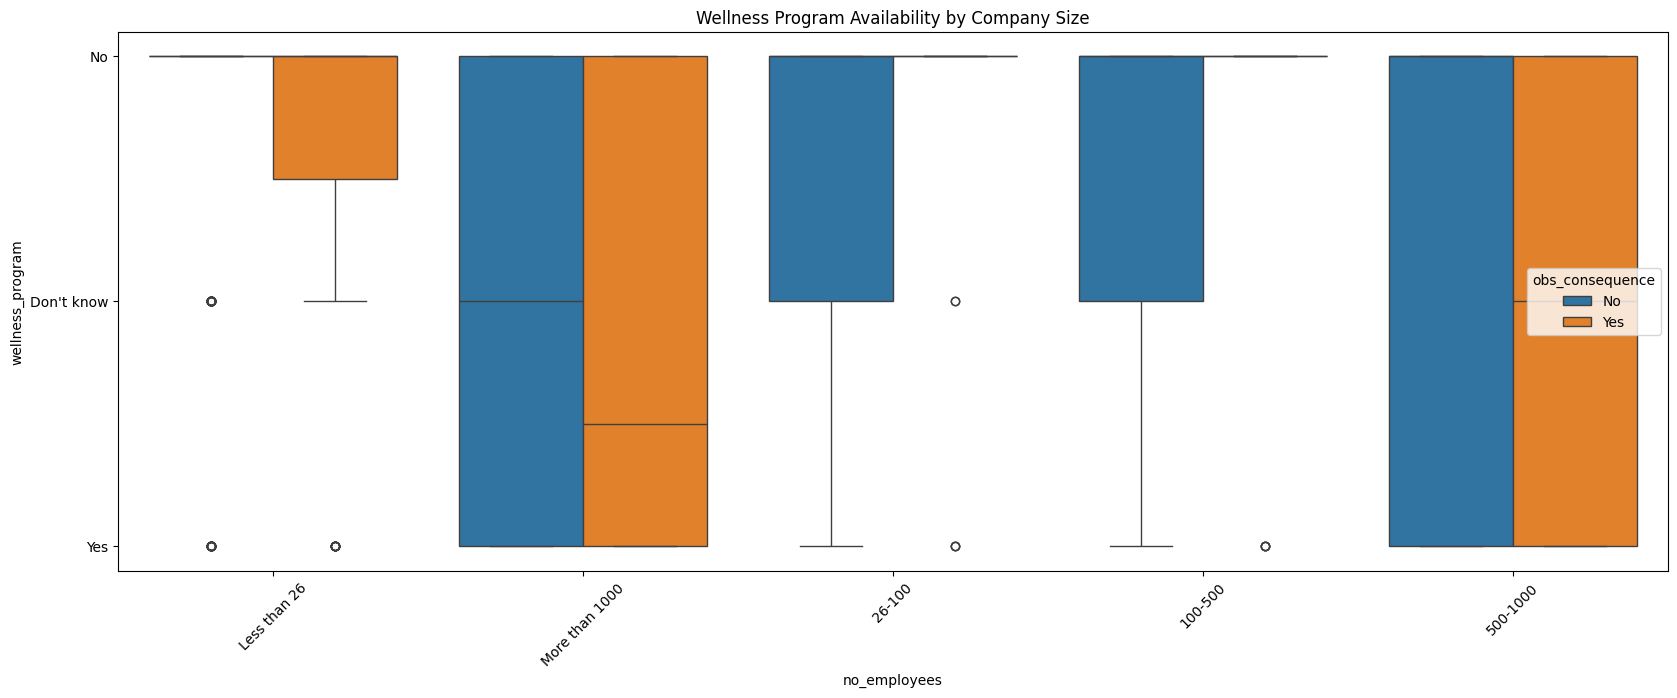

In [46]:
# The distribution of wellness program agains number of employment by observered consequence
sns.boxplot(data=df, x='no_employees', y='wellness_program', hue='obs_consequence')
plt.title('Wellness Program Availability by Company Size')
plt.xticks(rotation=45)
plt.show()

In this section, I created various visualizations for the categorical columns using appropriate charts using functions from section two. These visualizations are used for exploratory data analysis (EDA) on the dataset. This shows my ability to generate clear and interpretable visualizations in Python.

# Section 5: GUI Development (16 marks)  

This section covers the creation of dynamic graphical user interfaces for visualizing data. I used Tkinter along with other visualization modules such as Matplotlib and Seaborn to render the graphs on the GUI. Tkinter is a Python GUI library designed for creating interactive interfaces. It provides various widgets, including buttons, dropdowns, text fields, canvases, and more, some of which are used in my visualizations.

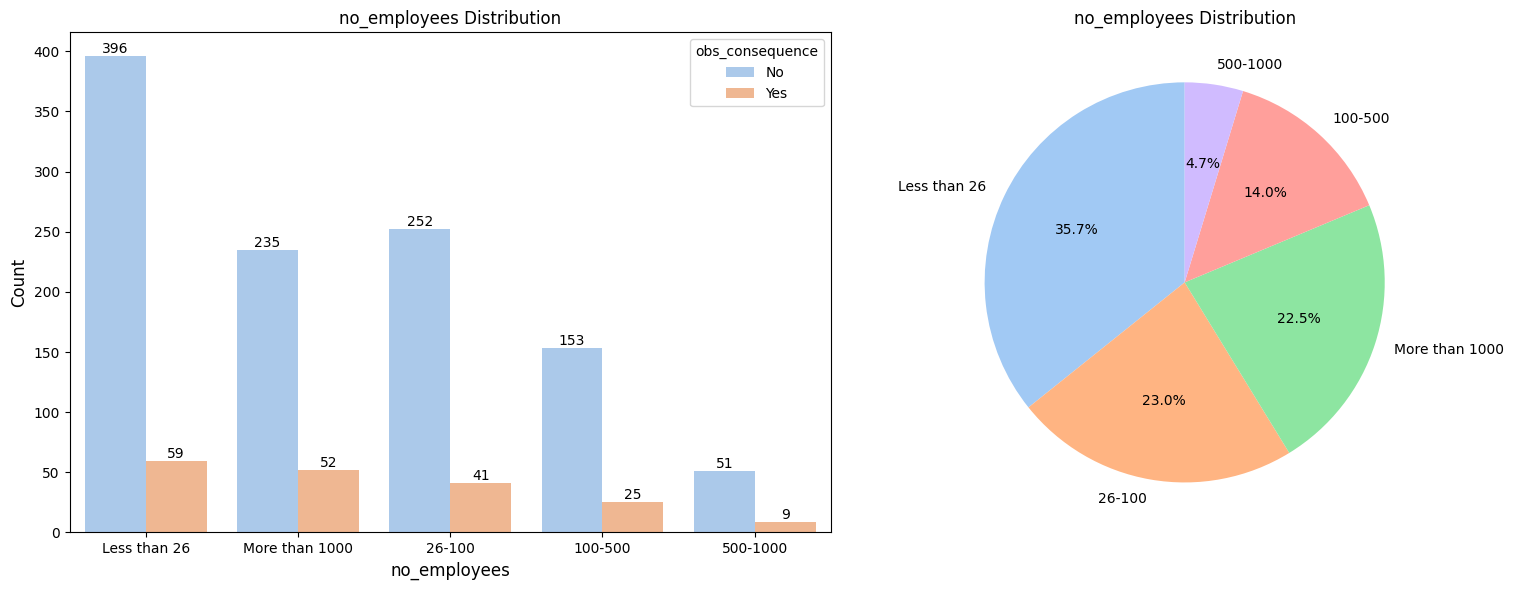

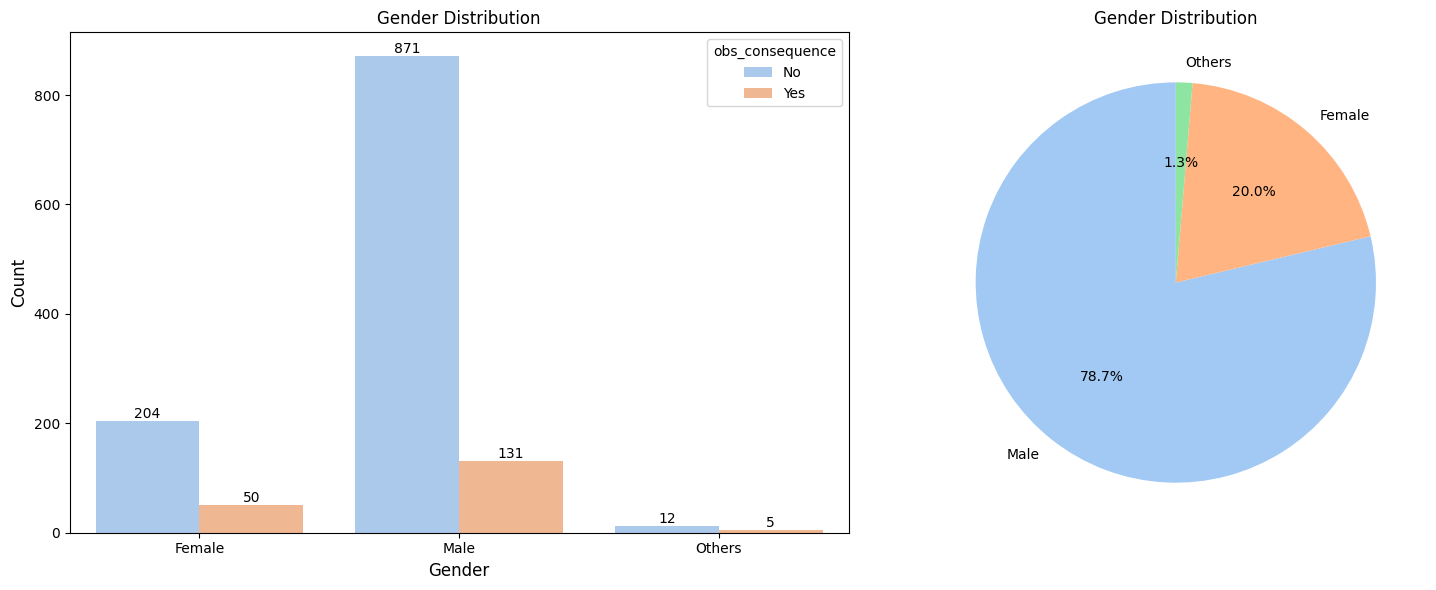

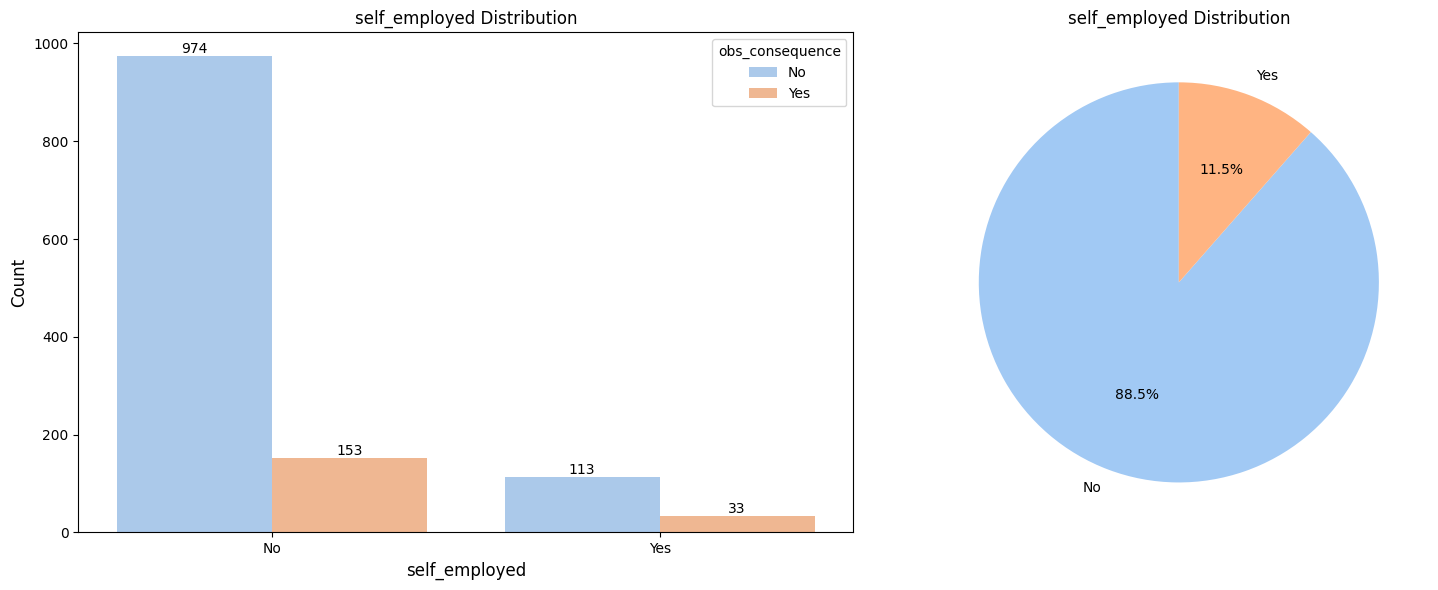

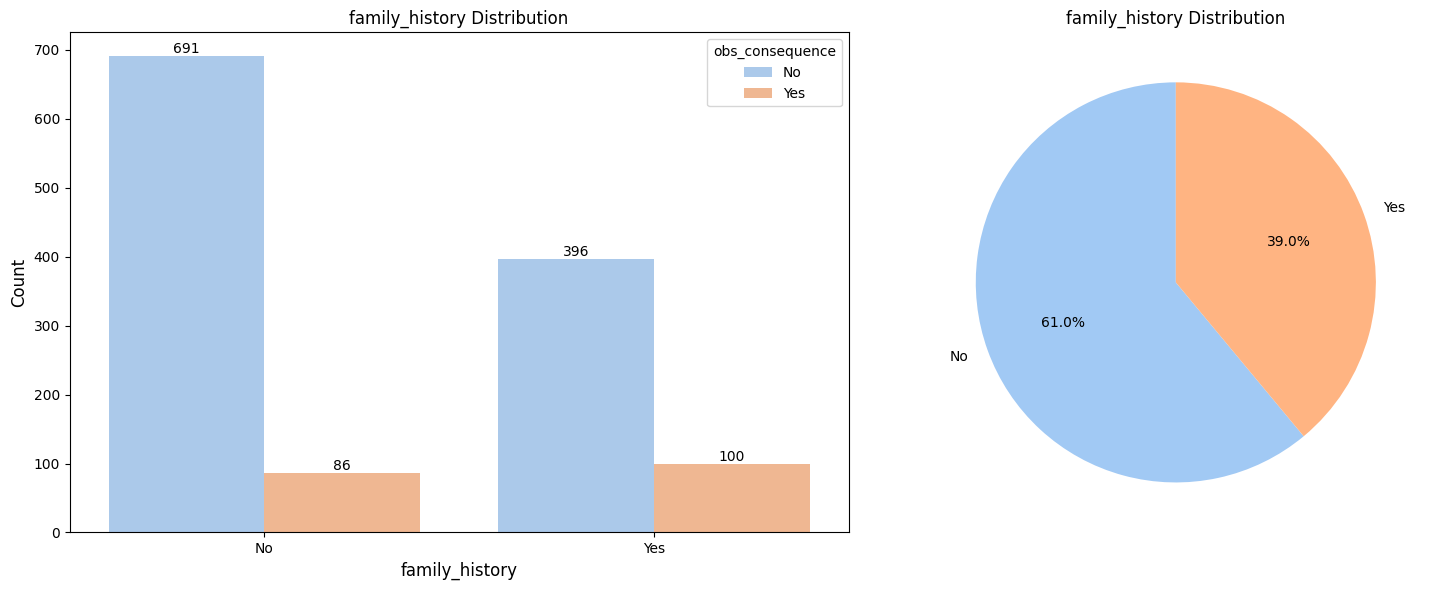

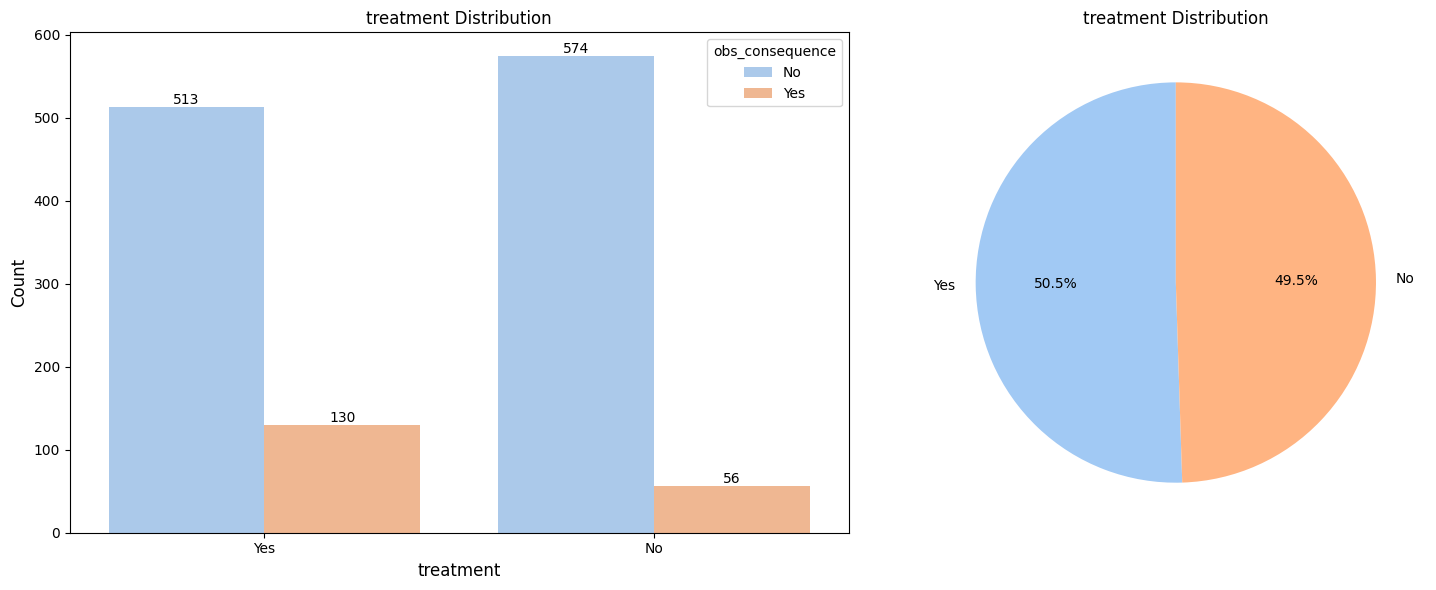

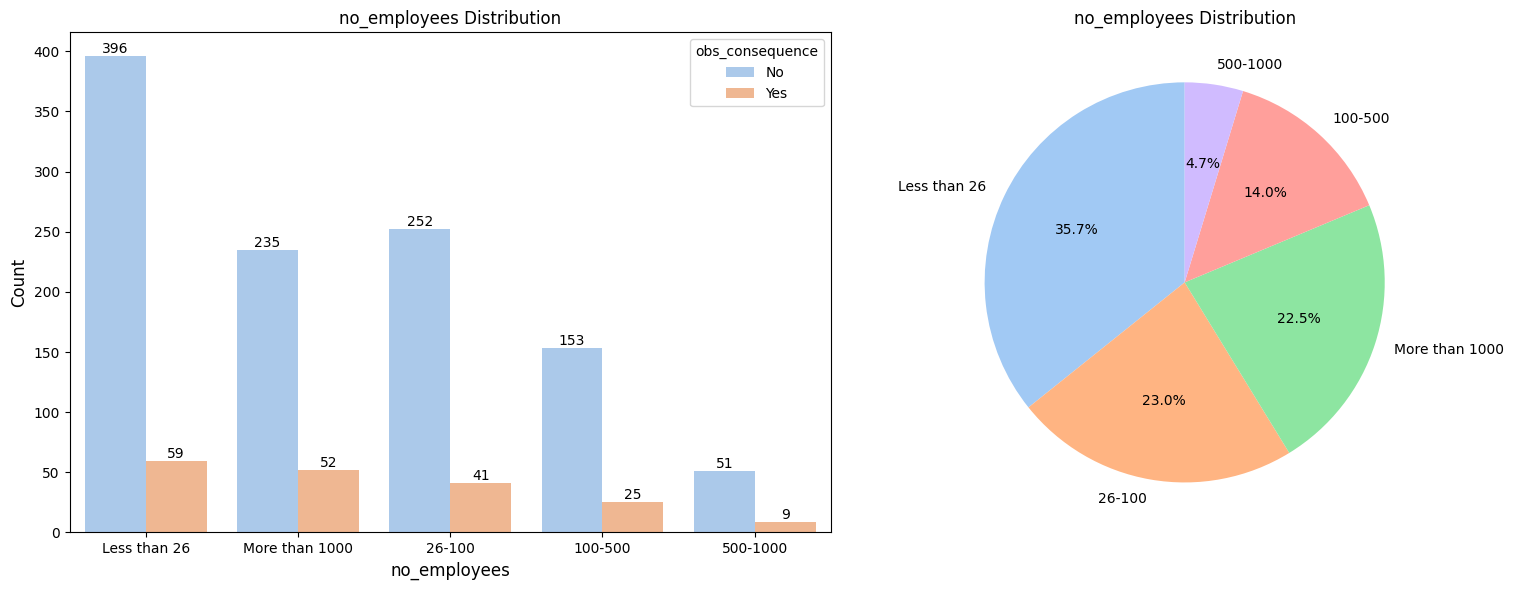

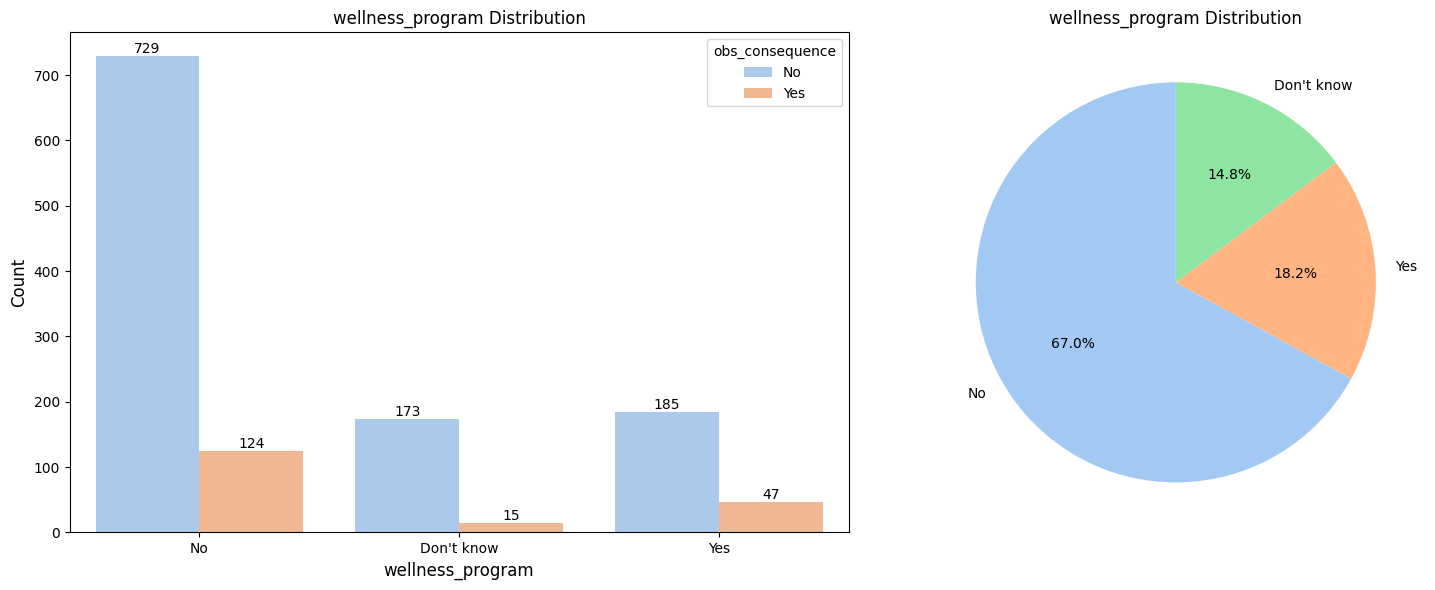

In [ ]:
# Univariate chart GUI for all columns 

import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn as sns

# get all columns and remove the target, YearMonth and country column
plot_cols = [col for col in df.columns if col not in ['Country', 'YearMonth']]
cols_index = 0

# Function to update the plot in the GUI
def update_plot(fig):
    for widget in frame_plot.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, anchor='center')

def dynamic_count_plot(df: pd.DataFrame, xColumn: str, hueColumn: str='obs_consequence'):
    # Create a figure and two subplots (axes)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Count plot for xColumn distribution
    sns.countplot(data=df, x=xColumn,hue=hueColumn, ax=ax1, palette='pastel')
    ax1.set_title(f'{xColumn} Distribution')
    ax1.set_xlabel(xColumn, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    for container in ax1.containers:
        ax1.bar_label(container)

    # Pie chart for obs_consequence distribution
    x_counts = df[xColumn].value_counts()
    ax2.pie(x_counts, labels=x_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel').as_hex())
    ax2.set_title(f'{xColumn} Distribution')

    # Adjust layout
    plt.tight_layout()
    # update lable text

    # dynamic_label_text(xColumn, hueColumn)
    update_plot(fig)

# def dynamic_label_text(df:DataFrame, xColumn, hueColumn):
#     df

#     txt = f'The plot above shows that '
#     pass

def on_previous():
    global cols_index, plot_cols, xColumn
    cols_index -= 1
    if cols_index < 0:
        cols_index = len(plot_cols)-1
    
    xColumn = plot_cols[cols_index]
    dynamic_count_plot(df, xColumn)

def on_next():
    global cols_index, plot_cols
    cols_index += 1
    if cols_index > len(plot_cols)-1:
        cols_index = 0
    
    xColumn = plot_cols[cols_index]
    dynamic_count_plot(df, xColumn)
    
# Create main application window
root = tk.Tk()
root.title("Dynamic Mental Health Survey Relationships")
root.geometry("1800x750")

# Configure grid layout
root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=3)
root.rowconfigure(0, weight=1)

# Frame for controls
left_frame = ttk.Frame(root, padding=10)
left_frame.grid(row=0, column=0)

# Frame for plot
frame_plot = ttk.Frame(root, padding=10)
frame_plot.grid(row=0, column=1)

# Frame for navigation buttons
nav_frame = ttk.Frame(root, padding=10)
nav_frame.grid(row=0, column=2)

# Previous and Next buttons
prev_button = ttk.Button(nav_frame, text="Previous", command=on_previous)
prev_button.pack(side=tk.LEFT, padx=5)

next_button = ttk.Button(nav_frame, text="Next", command=on_next)
next_button.pack(side=tk.RIGHT, padx=5)

# Add a default plot
dynamic_count_plot(df=df, xColumn='no_employees')

# Text label below the plot

# text_label = ttk.Label(frame_plot, text="This is a text label below the chart.", font=("Helvetica", 12))
# text_label.pack(pady=10)

# Run the main event loop
root.mainloop()


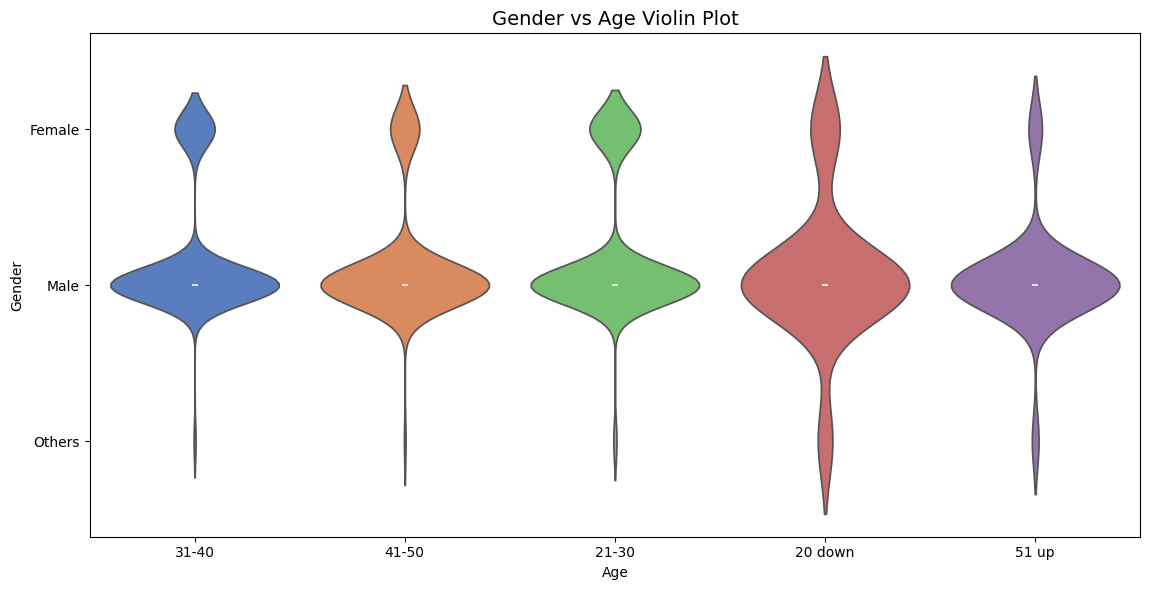

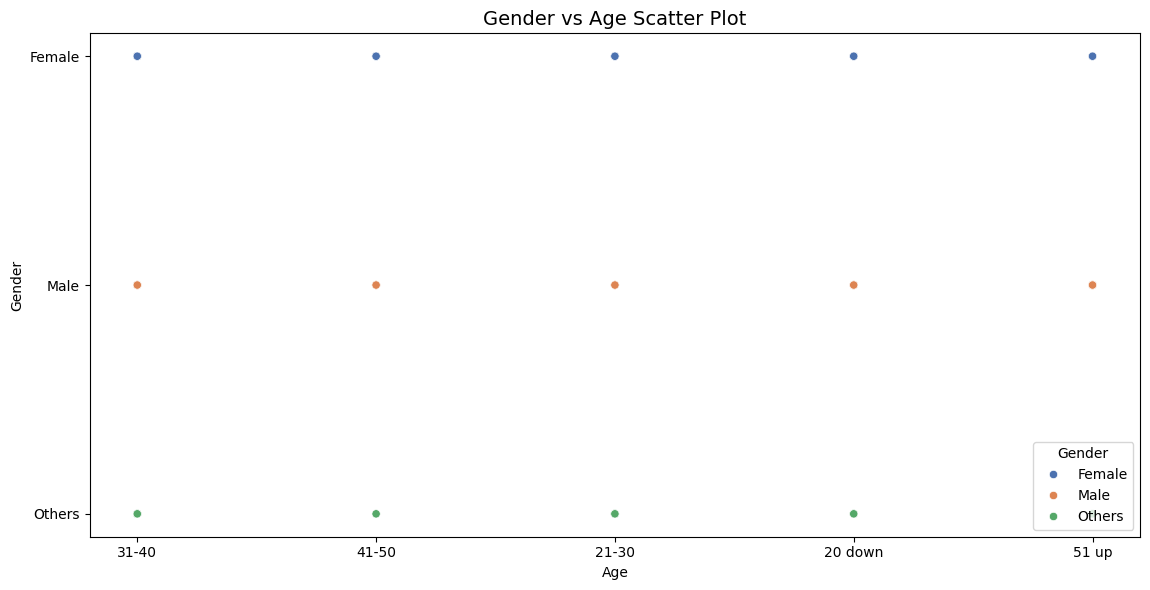

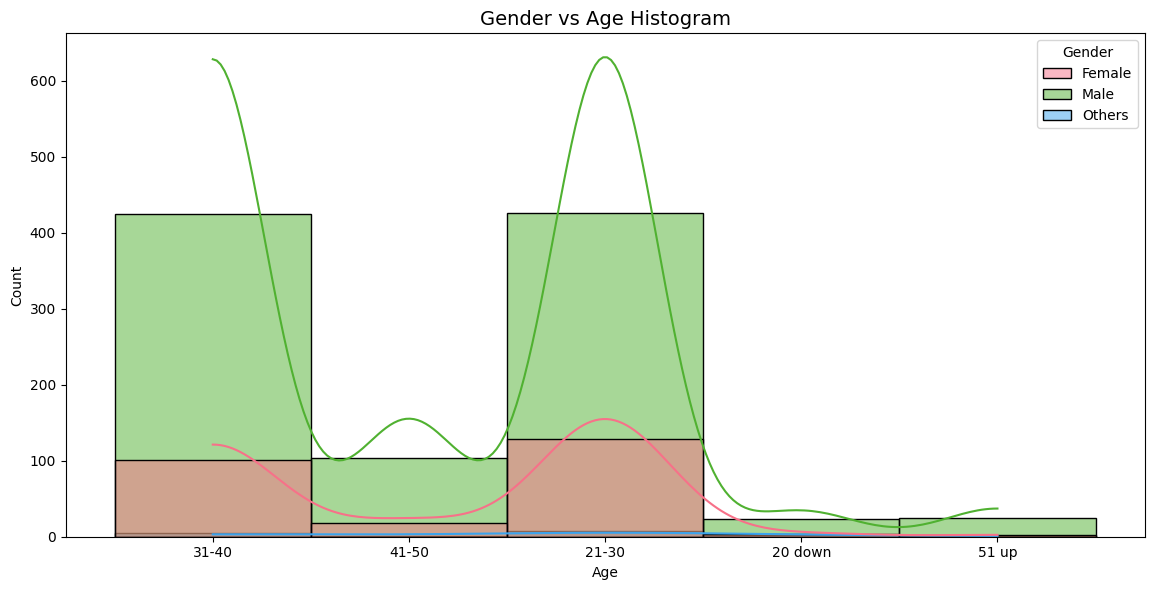

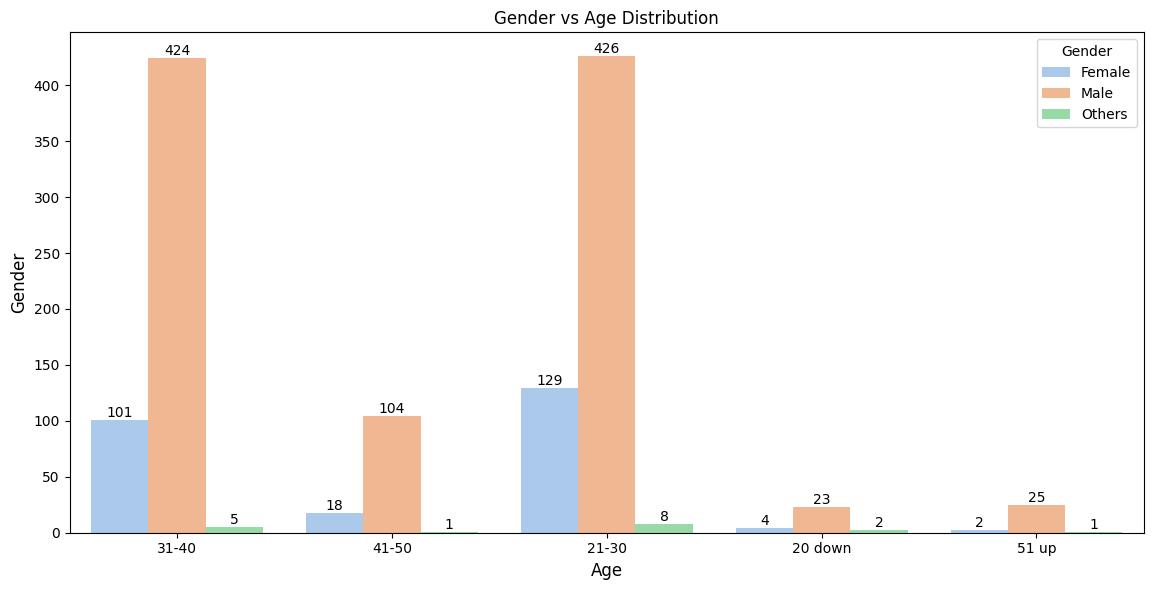

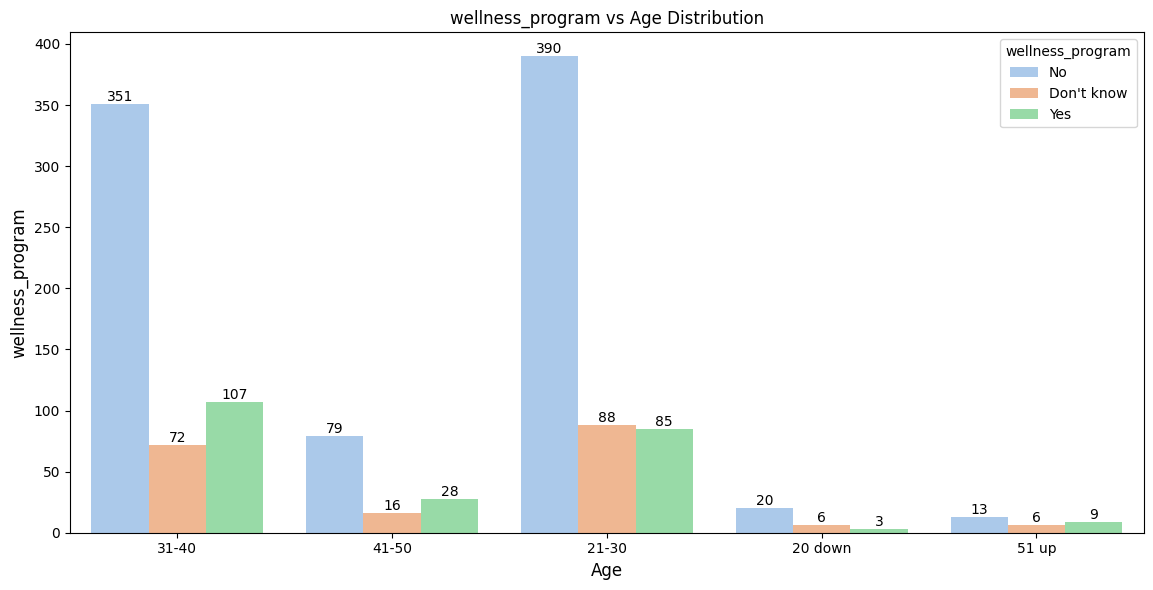

In [48]:
# Bivariate analysis GUI with multiple chart

# Update the column list dynamically
def update_cols(df: DataFrame, rm: str = None):
    try:
        cols_list: list = df.columns
        if rm:
            cols_list = [col for col in cols_list if col != rm]
        result = [col for col in cols_list if col not in ['Country', 'obs_consequence', 'YearMonth']]

        return result
    except Exception as e:
        print(f"Error updating columns: {e}")
        return []

# Function to update the plot in the GUI
def update_plot(fig):
    for widget in frame_plot.winfo_children():
        widget.destroy()
    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, anchor='center')

def dynamic_count_plot(df: DataFrame, xColumn: str, plot_type: str, hueColumn: str):
    try:
        fig, ax = plt.subplots(figsize=(10, 6))

        if plot_type == "Count Plot":
            sns.countplot(data=df, x=xColumn, hue=hueColumn, ax=ax, palette='pastel')
            ax.set_title(f'{hueColumn} vs {xColumn} Distribution')
            ax.set_xlabel(xColumn, fontsize=12)
            ax.set_ylabel(hueColumn, fontsize=12)
            for container in ax.containers:
                ax.bar_label(container)
        elif plot_type == 'Box Plot':
            sns.boxplot(data=df, x=xColumn, y=hueColumn, palette='Set3', ax=ax)
            ax.set_title(f'{hueColumn} vs {xColumn} Box Plot', fontsize=14)
        elif plot_type == 'Violin Plot':
            sns.violinplot(data=df, x=xColumn, y=hueColumn, palette='muted', ax=ax)
            ax.set_title(f'{hueColumn} vs {xColumn} Violin Plot', fontsize=14)
        elif plot_type == 'Scatter Plot':
            sns.scatterplot(data=df, x=xColumn, y=hueColumn, hue=hueColumn, palette='deep', ax=ax)
            ax.set_title(f'{hueColumn} vs {xColumn} Scatter Plot', fontsize=14)
        elif plot_type == 'Histogram':
            sns.histplot(data=df, x=xColumn, hue=hueColumn, kde=True, palette='husl', ax=ax)
            ax.set_title(f'{hueColumn} vs {xColumn} Histogram', fontsize=14)
        elif plot_type == 'Swarm Plot':
            sns.swarmplot(data=df, x=xColumn, y=hueColumn, palette='tab10', ax=ax)
            ax.set_title(f'{hueColumn} vs {xColumn} Swarm Plot', fontsize=14)

        plt.tight_layout()
        update_plot(fig)
    except Exception as e:
        print(f"Error generating plot: {e}")

# Update xcol dropdown
def on_xcol_change(event):
    xcol_data = xcol.get()
    hue_data = hue.get()
    plot_data = plot.get()

    # Update hue_values dynamically based on the selected xcol
    global hue_values
    hue_values = update_cols(df, xcol_data)
    hue_dropdown['values'] = hue_values
    hue.set(hue_data)

    dynamic_count_plot(df, xcol_data, plot_data, hue.get())

# Update hue dropdown
def on_hue_change(event):
    xcol_data = xcol.get()
    hue_data = hue.get()
    plot_data = plot.get()

    # Update xcol_values dynamically based on the selected hue
    global xcol_values
    xcol_values = update_cols(df, hue_data)
    xcol_dropdown['values'] = xcol_values
    xcol.set(xcol_data)

    dynamic_count_plot(df, xcol.get(), plot_data, hue_data)

# Update plot type
def on_plot_change(event):
    xcol_data = xcol.get()
    hue_data = hue.get()
    plot_data = plot.get()
    dynamic_count_plot(df, xcol_data, plot_data, hue_data)

# Create main application window
root = tk.Tk()
root.title("Dynamic Data Visualization")
root.geometry("1200x750")

# Frame for controls
control_frame = ttk.Frame(root, padding=10)
control_frame.pack(side=tk.TOP, fill=tk.X)

# Frame for plot
frame_plot = ttk.Frame(root, padding=10)
frame_plot.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Initialize dynamic column lists
xcol_values = update_cols(df)
hue_values = update_cols(df, xcol_values[0])

# X column dropdown
xcol = tk.StringVar()
xcol_dropdown = ttk.Combobox(control_frame, textvariable=xcol, values=xcol_values, state="readonly")
xcol_dropdown.set("Select x feature")
xcol_dropdown.pack(side=tk.LEFT, padx=10)
xcol_dropdown.bind("<<ComboboxSelected>>", on_xcol_change)

# Hue column dropdown
hue = tk.StringVar()
hue_dropdown = ttk.Combobox(control_frame, textvariable=hue, values=hue_values, state="readonly")
hue_dropdown.set("Select hue feature")
hue_dropdown.pack(side=tk.LEFT, padx=10)
hue_dropdown.bind("<<ComboboxSelected>>", on_hue_change)

# Dropdown for selecting plot type
plot_values = ["Violin Plot", "Scatter Plot", "Histogram", "Box Plot", "Swarm Plot", "Count Plot"]
plot = tk.StringVar()
plot_dropdown = ttk.Combobox(control_frame, textvariable=plot, values=plot_values, state="readonly")
plot_dropdown.set("Select Plot Type")
plot_dropdown.pack(side=tk.LEFT, padx=10)
plot_dropdown.bind("<<ComboboxSelected>>", on_plot_change)

# Initialize with default plot
xcol.set(xcol_values[0])
hue.set(hue_values[0])
plot.set(plot_values[0])
dynamic_count_plot(df, xcol_values[0], plot_values[0], hue_values[0])

# Run the main event loop
root.mainloop()


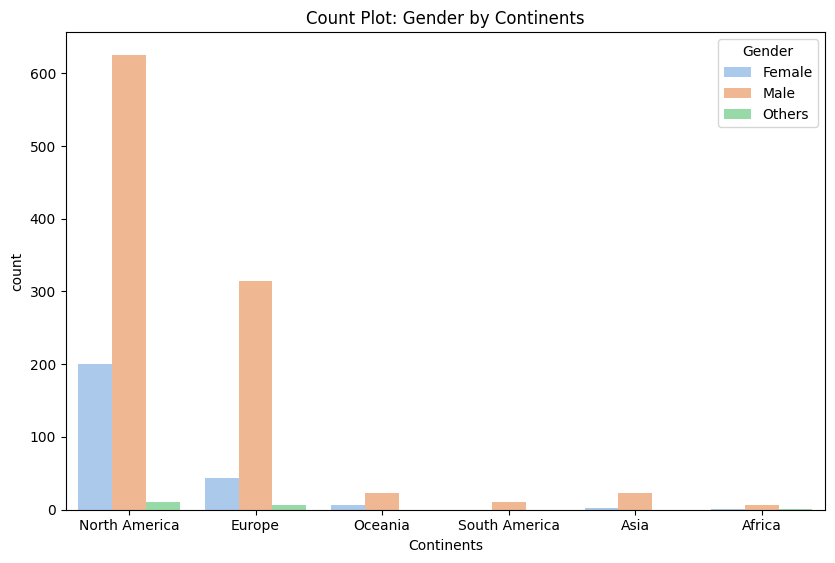

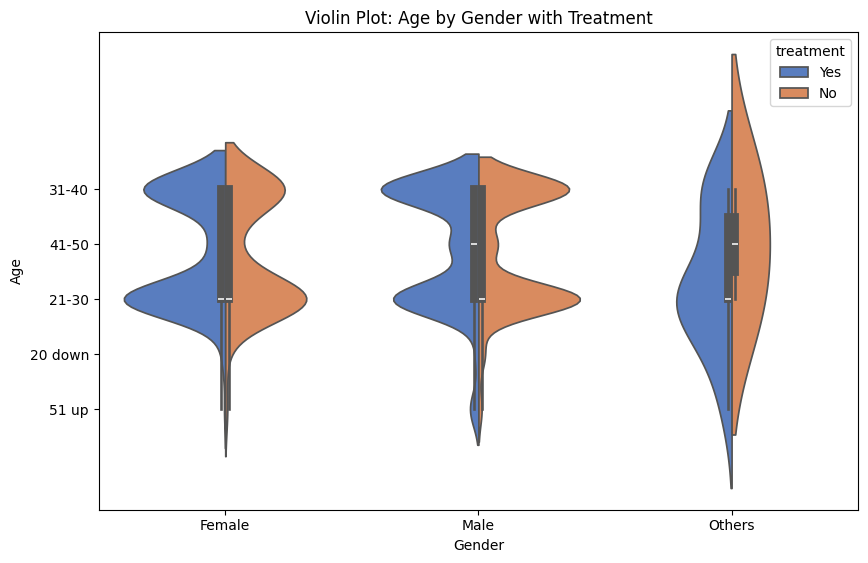

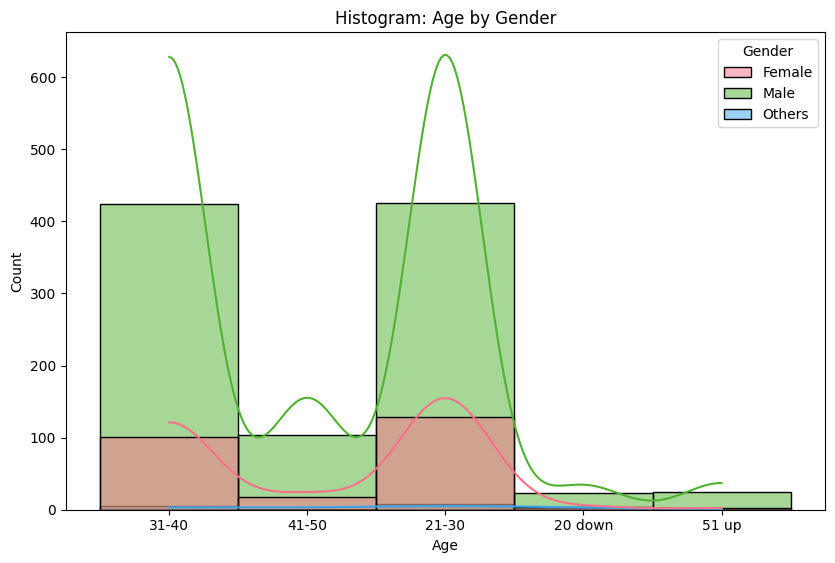

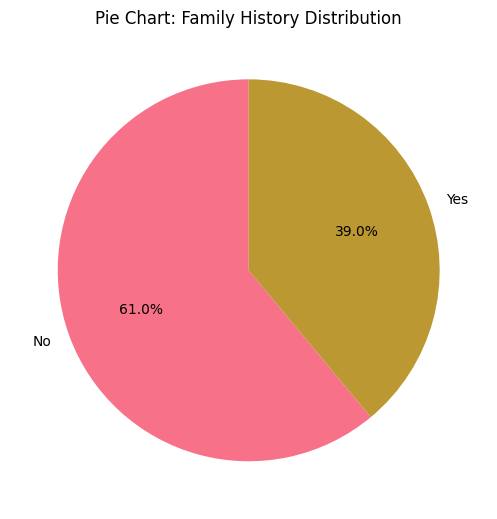

In [49]:
# Dynamic GUI with chart description

# Function to update the plot in the GUI
def update_plot(fig, description):
    for widget in frame_plot.winfo_children():
        widget.destroy()
    
    # Add description label
    description_label = tk.Label(frame_plot, text=description, wraplength=900, justify="center", font=("Arial", 11))
    description_label.pack(side=tk.TOP, fill=tk.X, padx=5, pady=5)
    
    # Add the plot
    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Plotting functions
def plot_count():
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=df, x="Continents", hue="Gender", ax=ax, palette="pastel")
    ax.set_title("Count Plot: Gender by Continents")
    description = (
        "A count plot showing the distribution of genders across continents. "
        "From the plot, North America has the highest number of respondents, with males leading in the number of respondents across all continents."
    )
    update_plot(fig, description)

def plot_violin():
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.violinplot(data=df, x="Gender", y="Age", hue="treatment", ax=ax, split=True, palette="muted")
    ax.set_title("Violin Plot: Age by Gender with Treatment")
    description = (
        "A violin plot representing the age distribution for gender and treatment. "
        "According to the plot, the majority of respondents fall within the age groups of 21-30 and 31-40, with approximately half of them having started treatment."
    )
    update_plot(fig, description)


def plot_histogram():
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data=df, x="Age", hue="Gender", kde=True, palette="husl", ax=ax)
    ax.set_title("Histogram: Age by Gender")
    description = (
        "This Histogram shows the distribution of ages for different genders. "
        "From on the plot, a higher number of male respondents participated in the survey across all age ranges."
    )
    update_plot(fig, description)


def plot_piechart():
    fig, ax = plt.subplots(figsize=(8, 6))

    values = df['family_history'].value_counts()
    labels = values.index
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl"))
    ax.set_title("Pie Chart: Family History Distribution")
    description = (
        "This Pie Chart visualizes the distribution of family_history of mental health. "
        "It can be observed that 61% of the respondents have a family history of mental health, while the remaining respondents do not."
    )
    update_plot(fig, description)


# Main application window
root = tk.Tk()
root.title("Interactive Plotting Application with Dynamic Descriptions")
root.geometry("1000x750")

# Frame for controls
frame_controls = ttk.Frame(root, padding=10)
frame_controls.pack(side=tk.TOP, fill=tk.X)

# Frame for plot and description
frame_plot = ttk.Frame(root, padding=10)
frame_plot.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Buttons to switch between plots
ttk.Button(frame_controls, text="Count Plot", command=plot_count).pack(side=tk.LEFT, padx=5, pady=5)
ttk.Button(frame_controls, text="Violin Plot", command=plot_violin).pack(side=tk.LEFT, padx=5, pady=5)
ttk.Button(frame_controls, text="Histogram", command=plot_histogram).pack(side=tk.LEFT, padx=5, pady=5)
ttk.Button(frame_controls, text="Pie Chart", command=plot_piechart).pack(side=tk.LEFT, padx=5, pady=5)

# Display the default plot
plot_count()

# Run the application
root.mainloop()

In this section, I combined widgets such as frames, buttons, and dropdowns to build three dynamic GUIs. These GUIs are designed to check relationships among various columns dynamically. This section demonstrates my ability to create user-centric, interactive interfaces that enhance functionality and provide a better user experience.

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In this coursework, I analyze mental health cases among employees from various organizations or companies using a free Kaggle dataset. The dataset contains 27 columns, from which 11 were selected for analysis. These columns provide key information on the employees’ mental health status and support.

- Age, Country, and Gender: Provides demographic details such as age, region, and gender.
- Self_employed: Indicates whether the respondent is self-employed or working for an organization.
- Family_history: Shows if there is a history of mental health issues in the respondent’s family.
- Treatment: Indicates whether the respondent is receiving treatment for mental health.
- No_employees: Specifies the number of employees in the respondent’s company.
- Wellness_program: Tells if the company offers well-being programs for employees.
- Leave: Indicates whether the company provides leave for employees.
- Care_options: Shows if the company offers care options to their staff.
- Obs_consequence: Describes whether the respondent has mental health challenges or not.

This data helps explore the relationship between various factors and employee mental health in different work environments.

From the analysis, it can be seen that:

- Most mental health cases by region are reported from North America.
- By gender, mental health issues appear to be more common among men.
- The majority of respondents do not have a history of mental health issues in their families.
- Most respondents to the survey are men, indicating a potential gender bias in the data or a higher level of participation from male employees.


The project used GitHub for version control, allowing for efficient management of code updates, collaboration, and tracking changes throughout the development process.

A well-documented process of the project is provided in this work, detailing each step taken throughout the analysis, data understanding, data cleaning, and visualization. This documentation ensures clarity and transparency in the workflow. However, it is important to note that the project does not cover data transformation, normalization, or modeling, as these steps are outside the scope of this particular work.

# References:


Kaggle. 2025. Kaggle Datasets [Online]. Available from: https://www.kaggle.com/datasets [Accessed: 2 January 2025].

Matplotlib Documentation. 2025. Matplotlib documentation [Online]. Available from: https://matplotlib.org/stable/contents.html [Accessed: 2 January 2025].

Pandas Documentation. 2025. Pandas documentation [Online]. Available from: https://pandas.pydata.org/docs/ [Accessed: 2 January 2025].

Seaborn Documentation. 2025. Seaborn documentation [Online]. Available from: https://seaborn.pydata.org/ [Accessed: 2 January 2025].

Tkinter Documentation. 2025. Tkinter documentation [Online]. Available from: https://docs.python.org/3/library/tkinter.html [Accessed: 2 January 2025].

# Appendix:

(If any)